<a href="https://colab.research.google.com/github/jacksonguedes/IACD/blob/main/Aula05_Tratamento_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as srn
from math import ceil
import random
import statistics as sts

In [2]:
def map_condition(life_expectation):
    if 0 <= life_expectation < 10:
        return "lf < 10 "
    elif life_expectation < 20:
        return " 10 < lf < 20"
    elif life_expectation < 40:
        return " 20 < lf < 40"
    elif life_expectation <= 60:
        return "40 < lf < 60"
    return "unknown"

In [3]:
def box_plot_histogram(dataframe, feature, bins = 20):
    for classe, df in dataframe.items():
        title = feature + " - '" + classe + "' life expectation"

        #BoxPlot
        plt.figure()
        srn.boxplot(x=df[feature]).set_title(title)

    fig, axes = plt.subplots(2, 2, figsize=(12, 8)) # Tinha uma vírgula em 'fig, axes'

    i= 0
    for classe, df in dataframe.items():
        title = feature + " -" + classe

        # Histograma
        ax = axes[i // 2, i % 2]
        df[feature].hist(bins = bins, ax = ax)
        ax.set_title(title)
        ax.grid(False)
        i += 1

         # Ajusta automaticamente o espacamento
    plt.tight_layout()
    plt.show()
    return

In [4]:
def get_outliers(dataframe, outliers):
    index_outliers = {}
    all_outliers =[]

    for feature, valor in outliers.items():
        index_outliers[feature] = dataframe.index[dataframe[feature] > valor].tolist()
        all_outliers += index_outliers[feature]

    return index_outliers, list(set(all_outliers))

In [5]:
def update_df(dataset):
    df['very low'] = dataset[dataset['class'] == 'lf < 10']
    df['low'] = dataset[dataset['class'] == '10 < lf < 20']
    df['medium'] = dataset[dataset['class'] == '20 < lf < 40']
    df['high'] = dataset[dataset['class'] == '40 < lf < 60']

    return

In [7]:
# Importa dataframe
dataset = pd.read_csv('Health index1.csv', sep = ",")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hydrogen             470 non-null    int64  
 1   Oxigen               470 non-null    int64  
 2   Nitrogen             470 non-null    int64  
 3   Methane              470 non-null    int64  
 4   CO                   470 non-null    int64  
 5   CO2                  470 non-null    int64  
 6   Ethylene             470 non-null    int64  
 7   Ethane               470 non-null    int64  
 8   Acethylene           470 non-null    int64  
 9   DBDS                 470 non-null    float64
 10  Power factor         470 non-null    float64
 11  Interfacial V        470 non-null    int64  
 12  Dielectric rigidity  470 non-null    int64  
 13  Water content        470 non-null    int64  
 14  Health index         470 non-null    float64
 15  Life expectation     470 non-null    flo

In [8]:
# Imprimindo DataSet
dataset

Hydrogen  Oxigen  Nitrogen  Methane   CO   CO2  Ethylene  Ethane  \
0        2845    5860     27842     7406   32  1344     16684    5467   
1       12886      61     25041      877   83   864         4     305   
2        2820   16400     56300      144  257  1080       206      11   
3        1099      70     37520      545  184  1402         6     230   
4        3210    3570     47900      160  360  2130         4      43   
..        ...     ...       ...      ...  ...   ...       ...     ...   
465        15     227     52900        3   60   853         3      84   
466        15     334     47100        3   64   622         3     108   
467        15    1280     35000        2  675  2530         0       0   
468        15     169     50600        5   77   532         0      72   
469        15     308     39700        3   64   581         5      27   

     Acethylene  DBDS  Power factor  Interfacial V  Dielectric rigidity  \
0             7  19.0          1.00             45                   55   
1             0  45.0          1.00             45                   55   
2          2190   1.0          1.00             39                   52   
3             0  87.0          4.58             33                   49   
4             4   1.0          0.77             44                   55   
..          ...   ...           ...            ...                  ...   
465           0   0.0          1.00             32                   56   
466           0   0.0          1.00             32                   55   
467           0   5.0          0.30             45                   58   
468           0   0.0          1.21             33                   54   
469           0   0.0          1.00             32                   60   

     Water content  Health index  Life expectation  
0                0          95.2              19.0  
1                0          85.5              19.0  
2               11          85.3              19.0  
3                5          85.3               6.0  
4                3          85.2               6.0  
..             ...           ...               ...  
465             28          13.4              51.0  
466             12          13.4              51.0  
467              8          13.4               6.5  
468             11          13.4              51.0  
469             18          13.4              51.0  

[470 rows x 16 columns]

In [9]:
# Criar um novo dataframe a partir do original

new_df = dataset.copy()

new_df['Life expectation'].apply(map_condition):

A função apply() do Pandas permite aplicar uma função a cada elemento de uma coluna. map_conditioné uma função definida anteriormente que mapeia os valores da coluna 'Expectativa de vida' para uma classe com base em certas condições 0-10, 10-20, 20-40, ou 40-60). Portanto, essa linha está aplicando a função map_conditiona cada valor na coluna 'Expectativa de vida', criando uma nova série de dados com as classes correspondentes.  

new_df['class'] = ...:

Está criando uma nova coluna chamada 'class' no DataFrame new_df.
Os valores para essa coluna são os resultados da aplicação da função map_conditionà coluna 'Expectativa de vida', ou seja, as classes mapeadas de acordo com as condições na função map_condition.

In [10]:
# Criar as classes do problema de classificação

new_df['class'] = new_df['Life expectation'].apply(map_condition) # Add uma nova coluna
print(new_df.groupby(['class']).size())

class
 10 < lf < 20    105
 20 < lf < 40     70
40 < lf < 60     213
lf < 10           82
dtype: int64


In [11]:
new_df.head()

Hydrogen  Oxigen  Nitrogen  Methane   CO   CO2  Ethylene  Ethane  \
0      2845    5860     27842     7406   32  1344     16684    5467   
1     12886      61     25041      877   83   864         4     305   
2      2820   16400     56300      144  257  1080       206      11   
3      1099      70     37520      545  184  1402         6     230   
4      3210    3570     47900      160  360  2130         4      43   

   Acethylene  DBDS  Power factor  Interfacial V  Dielectric rigidity  \
0           7  19.0          1.00             45                   55   
1           0  45.0          1.00             45                   55   
2        2190   1.0          1.00             39                   52   
3           0  87.0          4.58             33                   49   
4           4   1.0          0.77             44                   55   

   Water content  Health index  Life expectation          class  
0              0          95.2              19.0   10 < lf < 20  
1              0          85.5              19.0   10 < lf < 20  
2             11          85.3              19.0   10 < lf < 20  
3              5          85.3               6.0       lf < 10   
4              3          85.2               6.0       lf < 10

In [12]:
# Divisão do dataframe por classes
df = {} # Criação de dicionário
update_df(new_df)

##1) Verifique se há algum valor nulo presente na base de dados. Se sim, escolha alguma forma de substituí-los. Substitui pela média, mediana, et.. Tem que analisar

In [13]:
# Verificando se existe zeros na base de dados

zeros_presentes = (new_df == 0).any().any()
zeros_presentes

True

In [14]:
# Verificação de valores nulos
(new_df == 0).sum() # Verifica quantas colunas possuem valores zero

Hydrogen                71
Oxigen                   0
Nitrogen                 0
Methane                 82
CO                       0
CO2                      0
Ethylene               214
Ethane                 209
Acethylene             432
DBDS                   310
Power factor             0
Interfacial V            0
Dielectric rigidity      0
Water content            2
Health index             0
Life expectation         0
class                    0
dtype: int64

In [15]:
quantidade_zeros_por_coluna = (new_df['Hydrogen'] == 0).sum()
print(quantidade_zeros_por_coluna)

71


In [16]:
new_df['Hydrogen'].describe()

count      470.000000
mean       404.261702
std       2002.142678
min          0.000000
25%          4.000000
50%          9.000000
75%         34.000000
max      23349.000000
Name: Hydrogen, dtype: float64

Text(0.5, 1.0, 'Hydrogen')

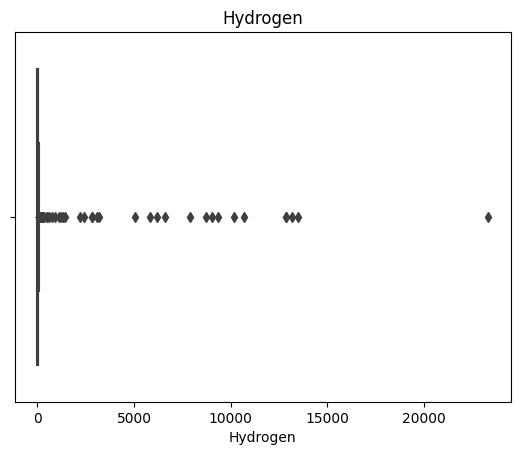

In [17]:
srn.boxplot(x=new_df['Hydrogen']).set_title('Hydrogen')

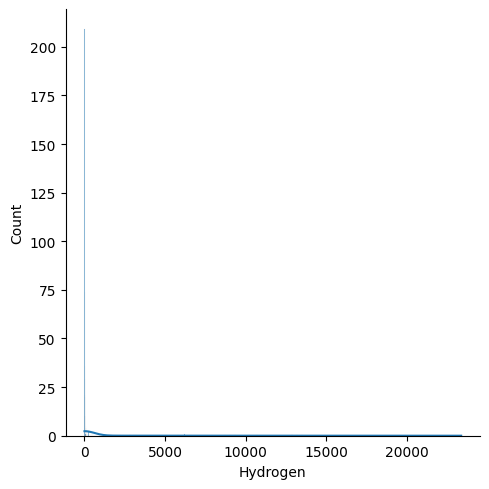

In [18]:
srn.displot(x=new_df['Hydrogen'], kde=True)

In [19]:
mediana = sts.median(new_df['Hydrogen'])
print(mediana)

9.0


In [20]:
new_df.loc[new_df['Hydrogen'] == 0, 'Hydrogen'] = mediana


In [21]:
# Estatisticas de cada feature para cada classe
sts_very_low = df['very low'].describe()
sts_low = df['low'].describe()
sts_medium = df['medium'].describe()
sts_high = df['high'].describe()

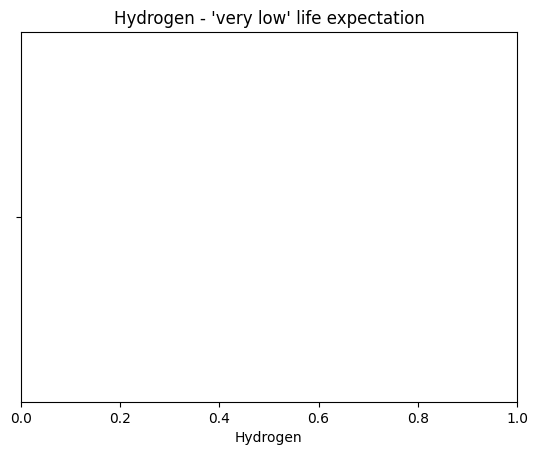

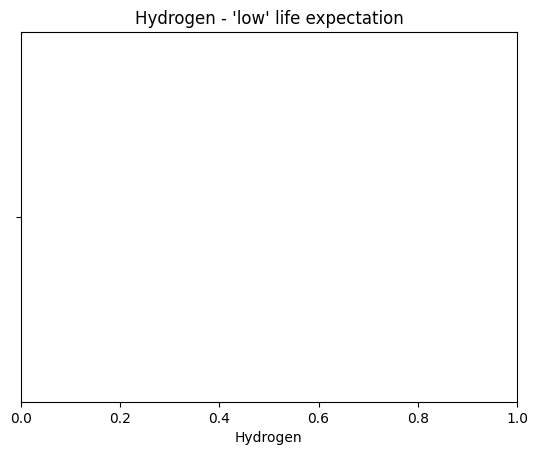

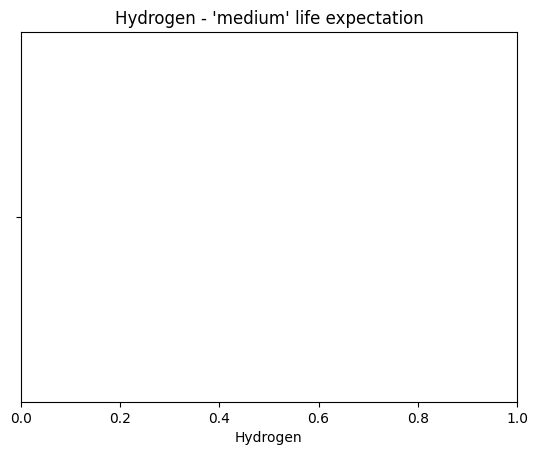

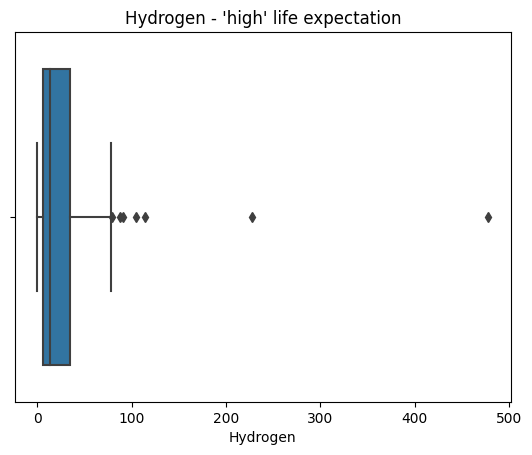

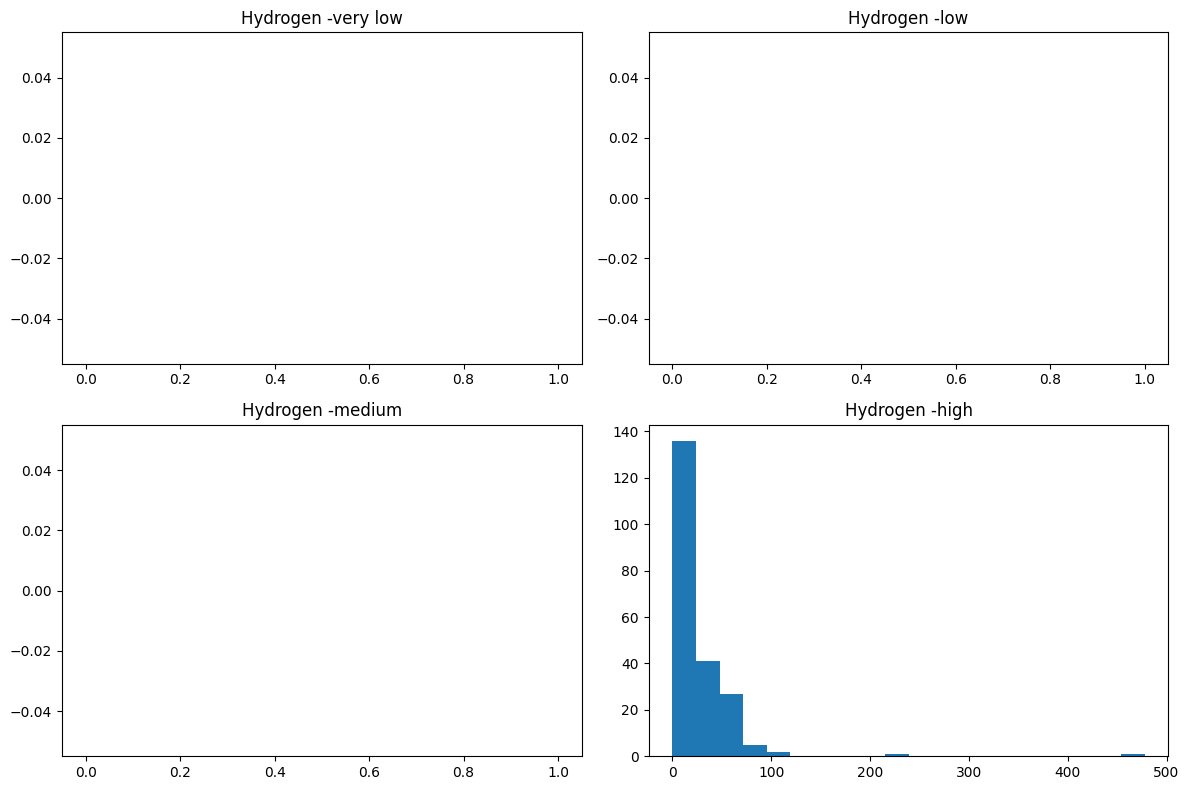

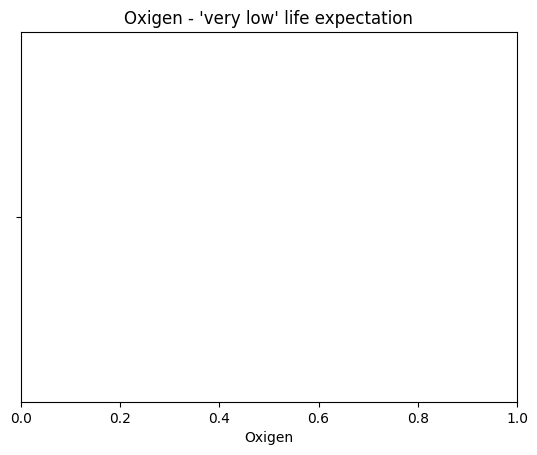

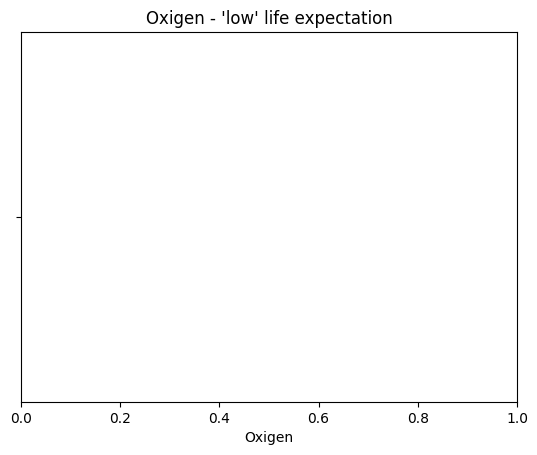

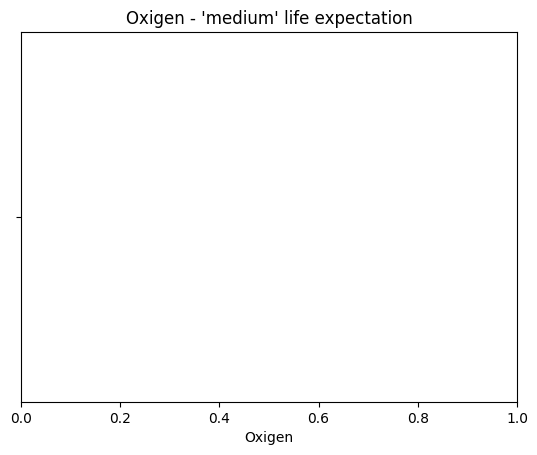

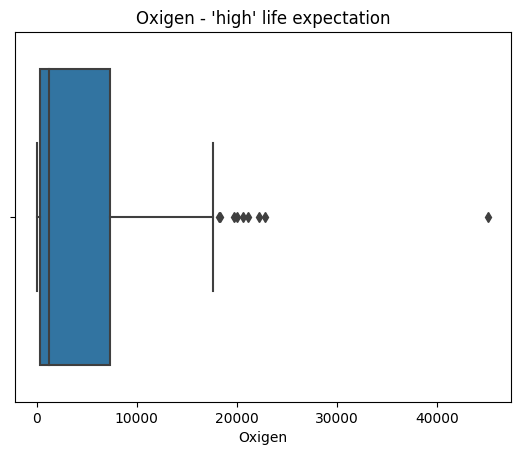

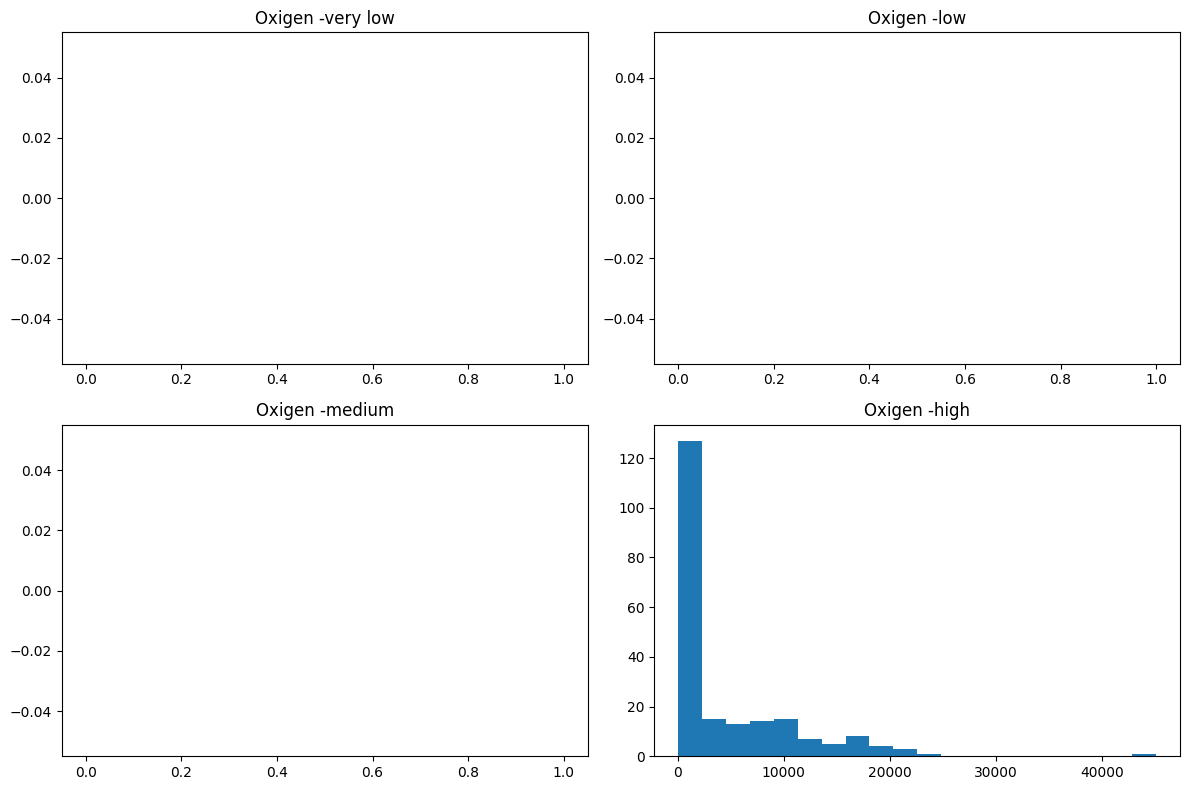

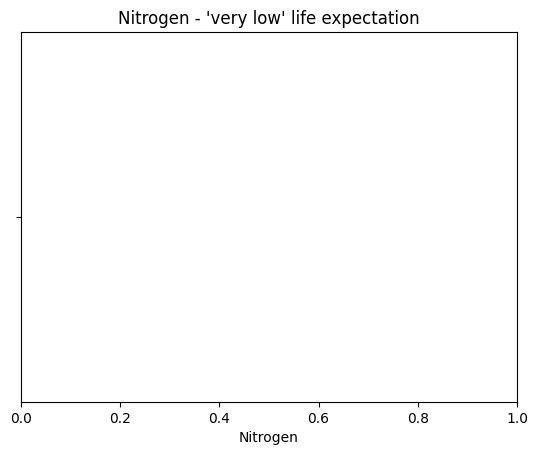

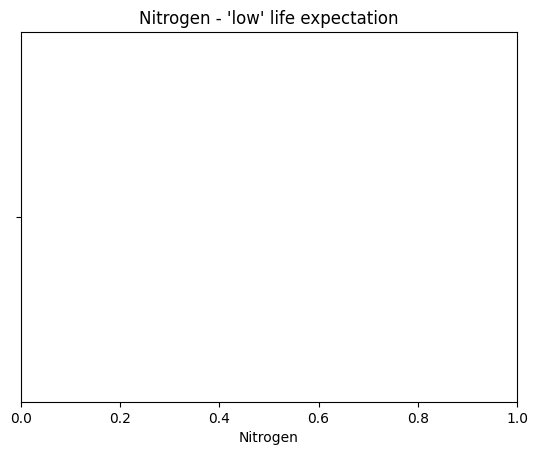

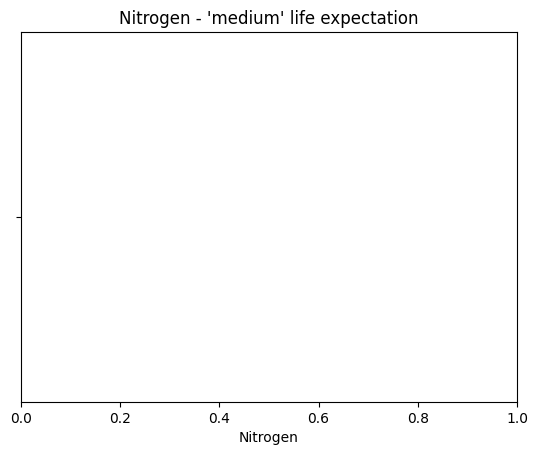

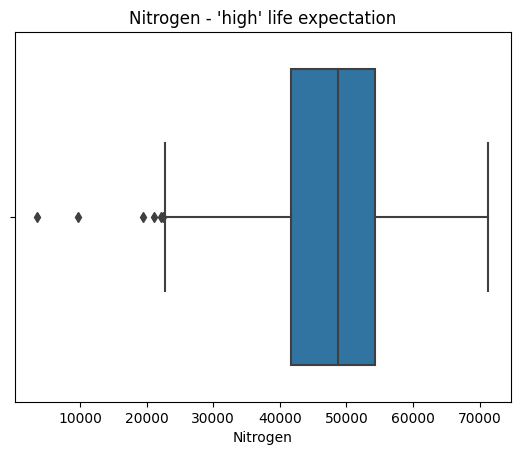

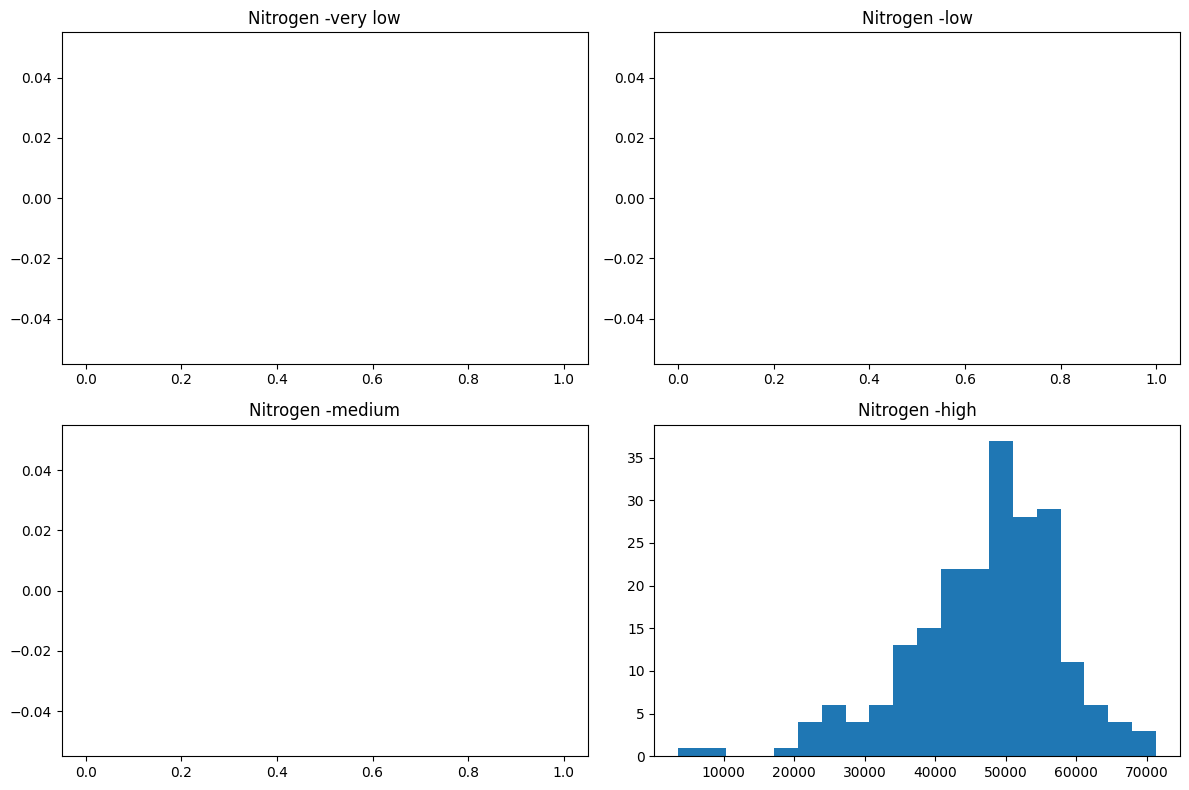

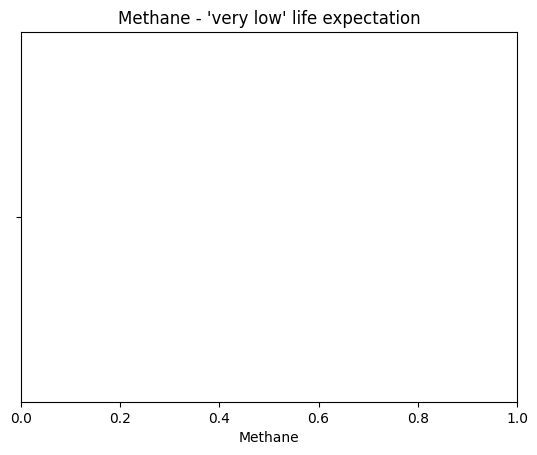

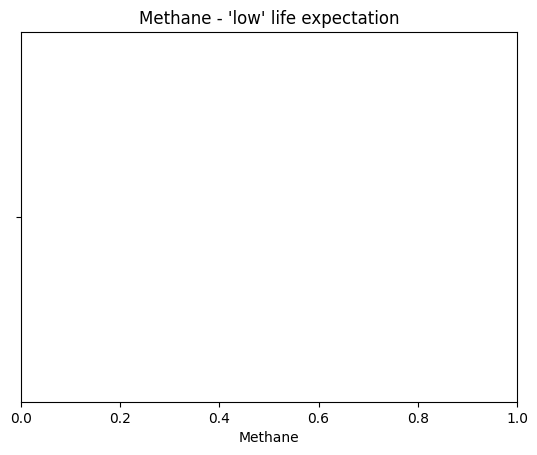

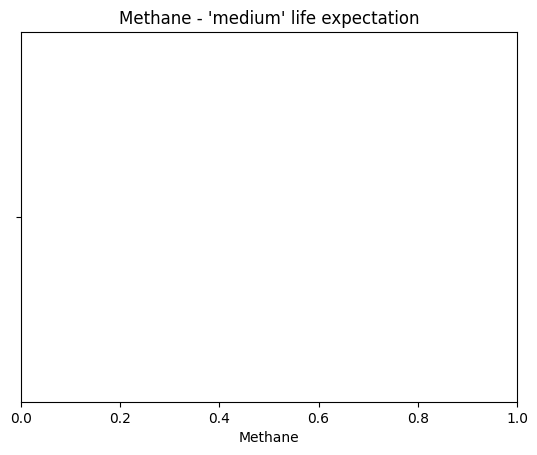

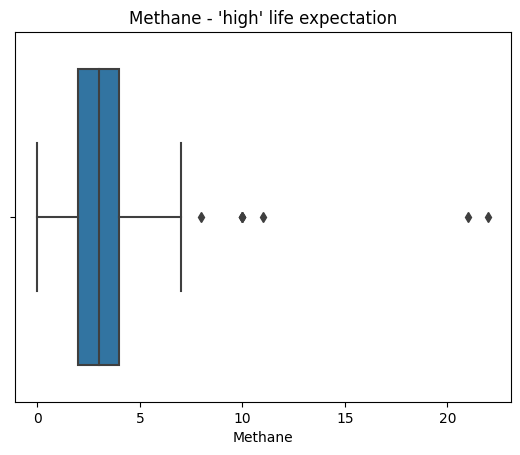

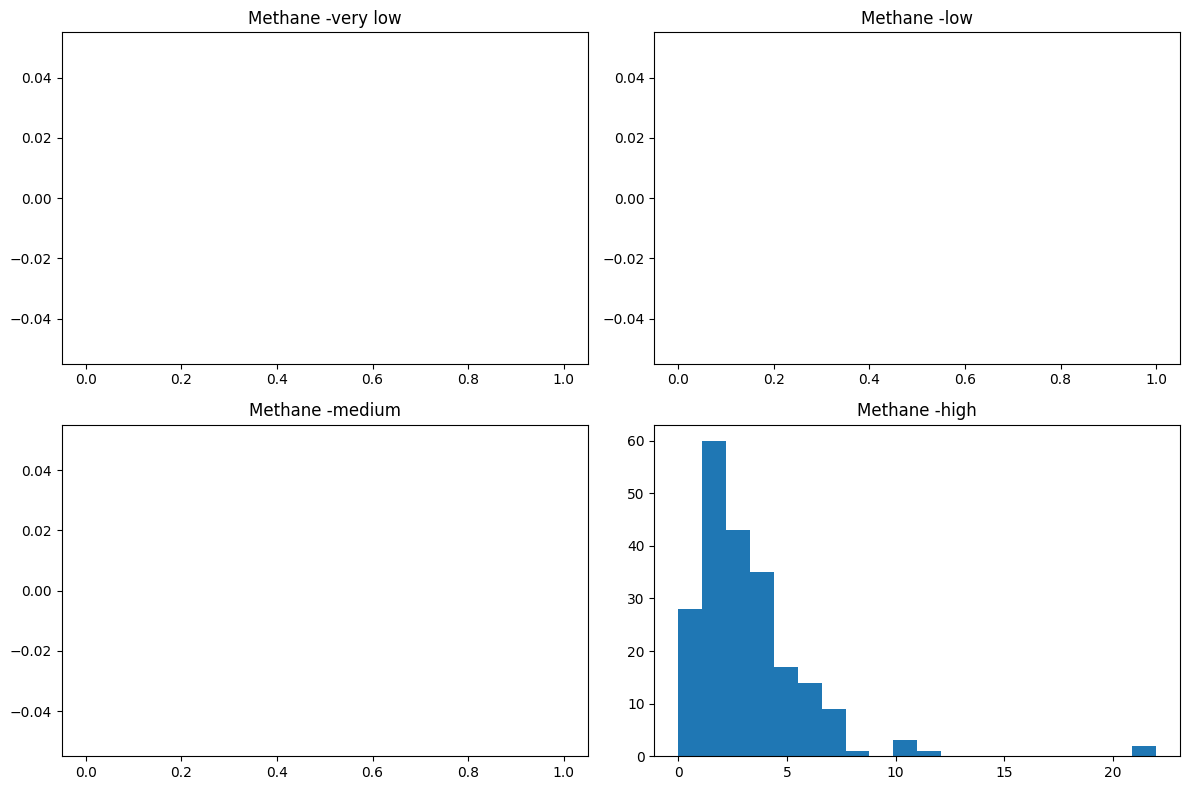

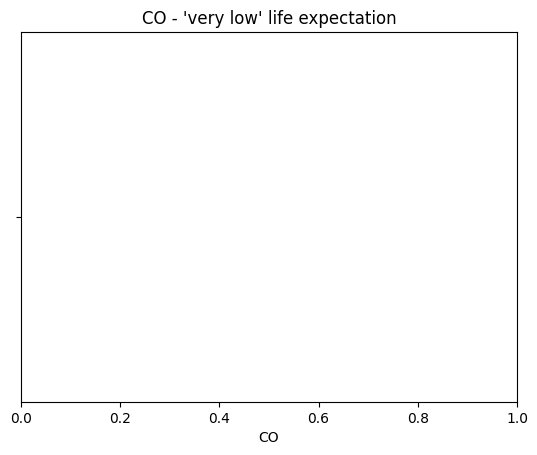

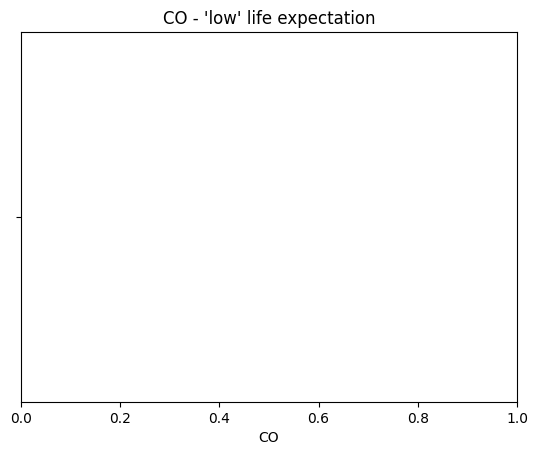

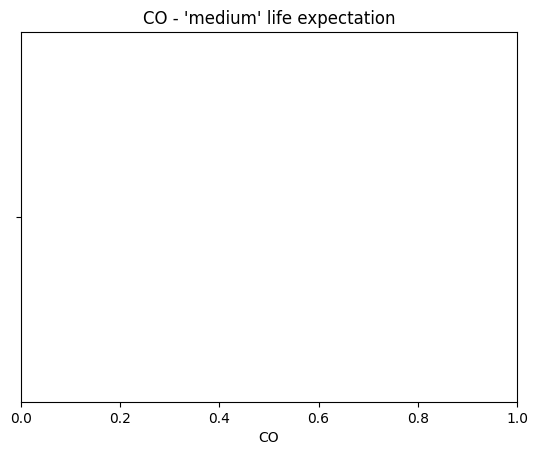

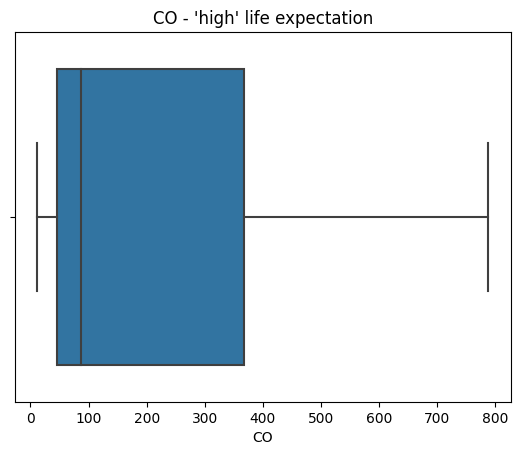

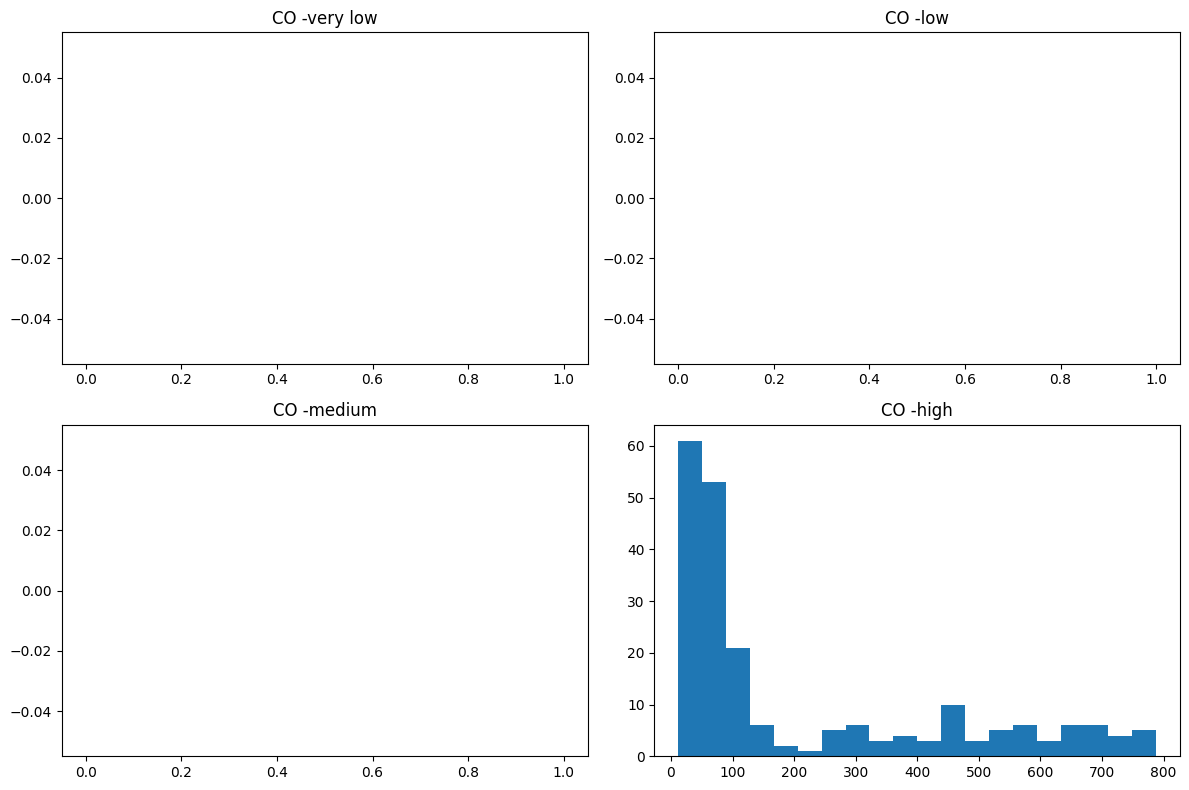

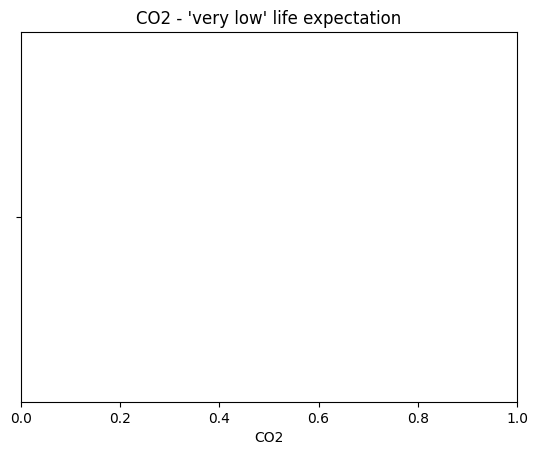

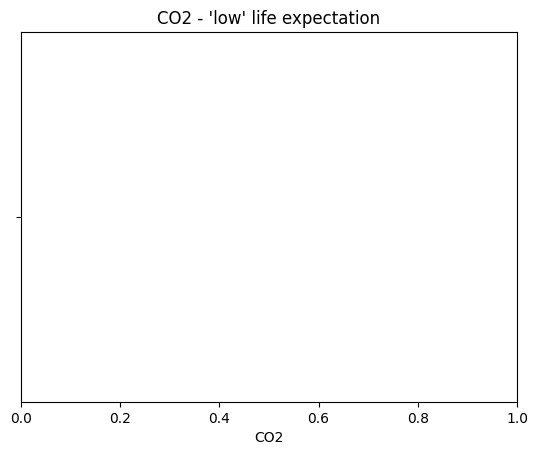

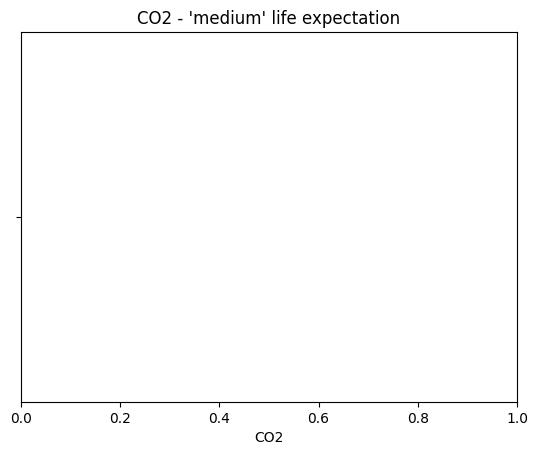

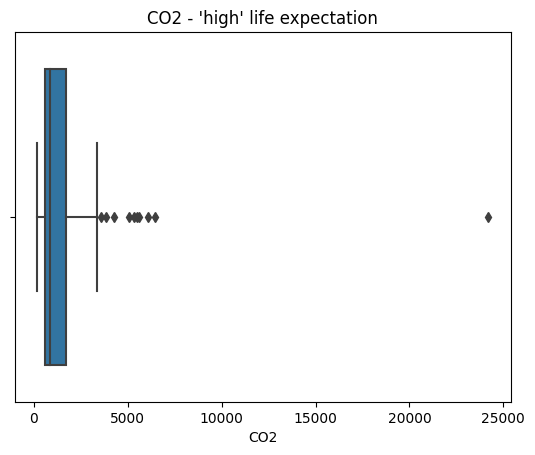

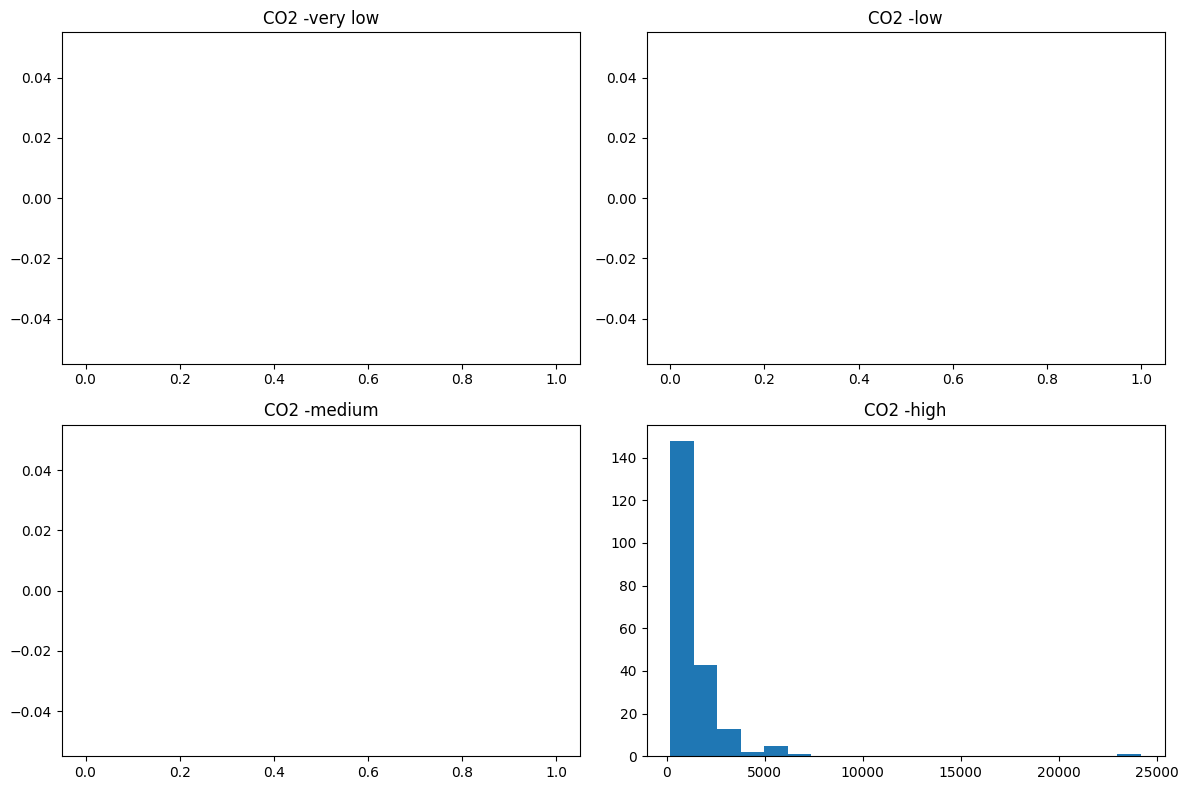

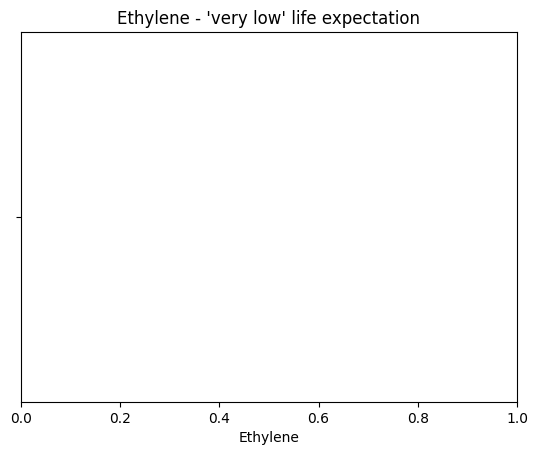

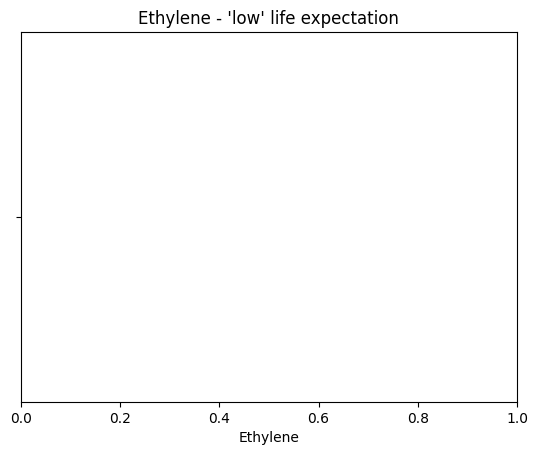

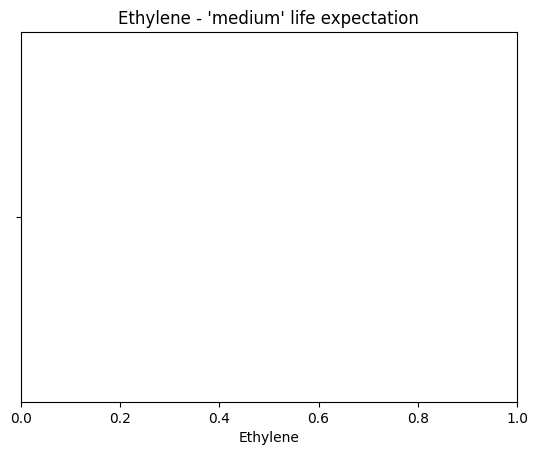

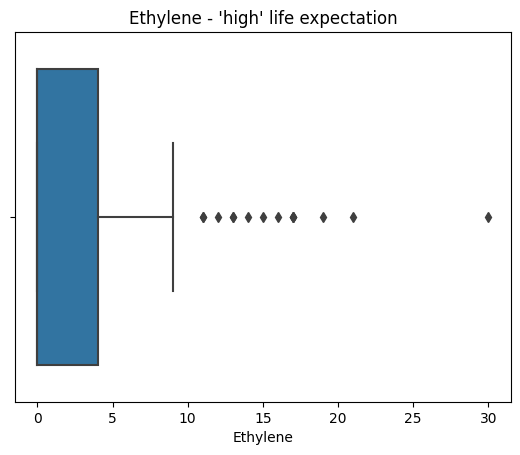

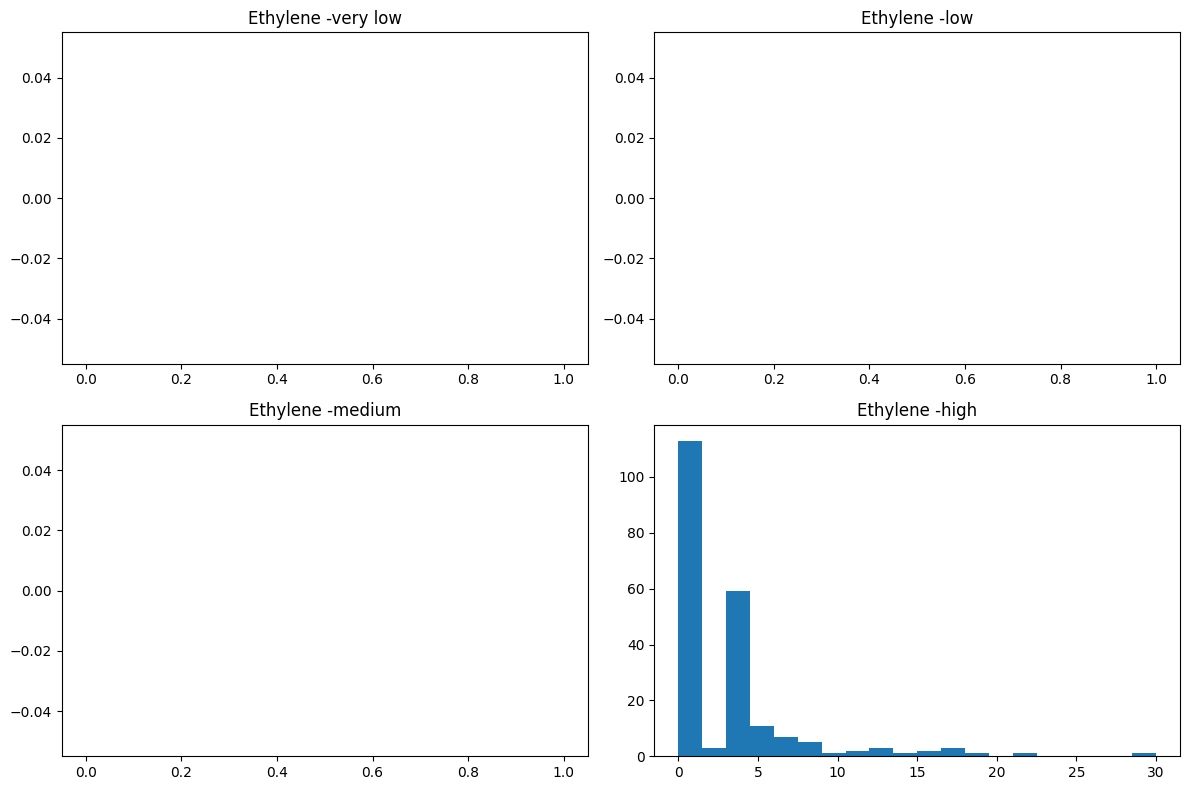

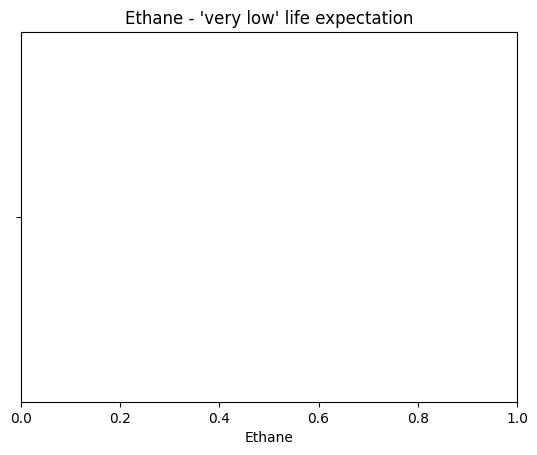

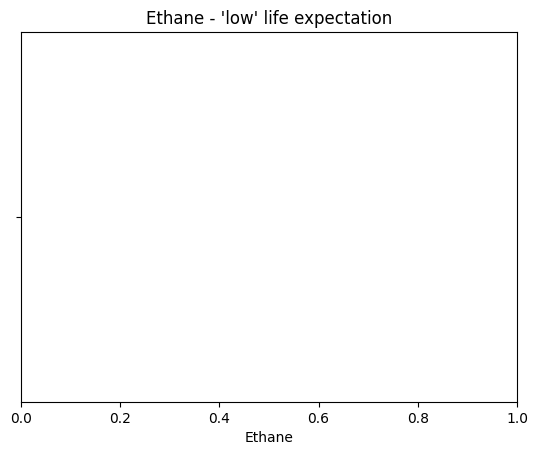

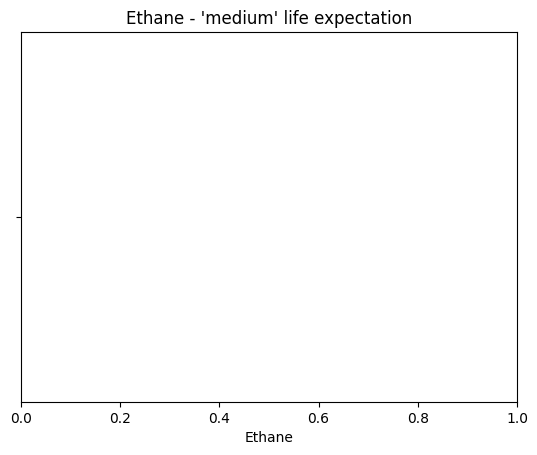

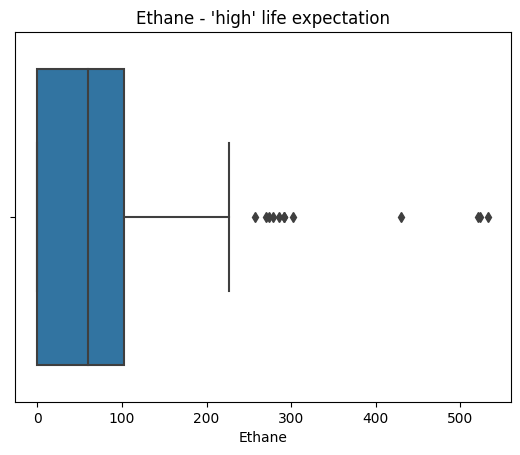

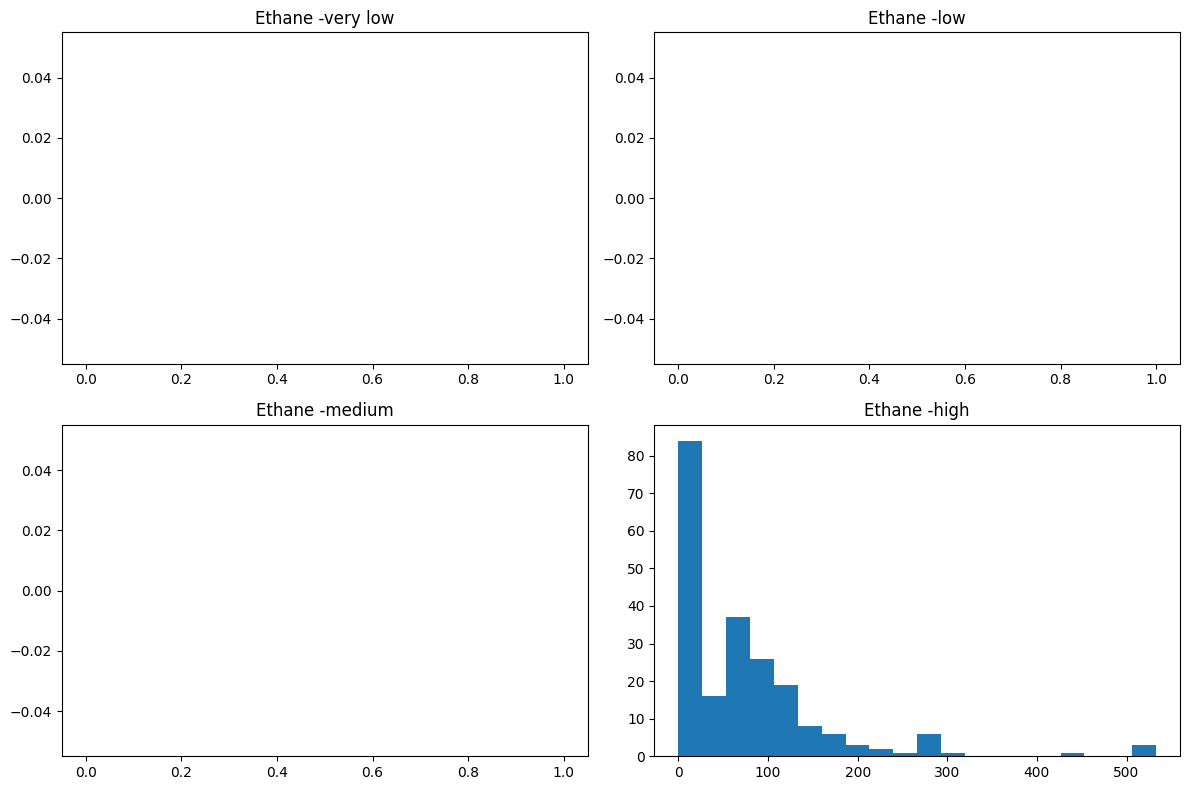

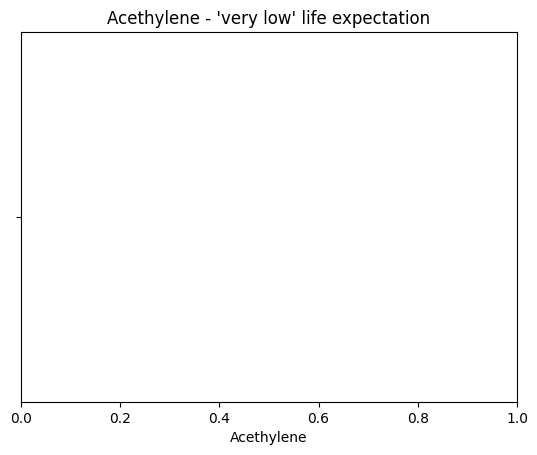

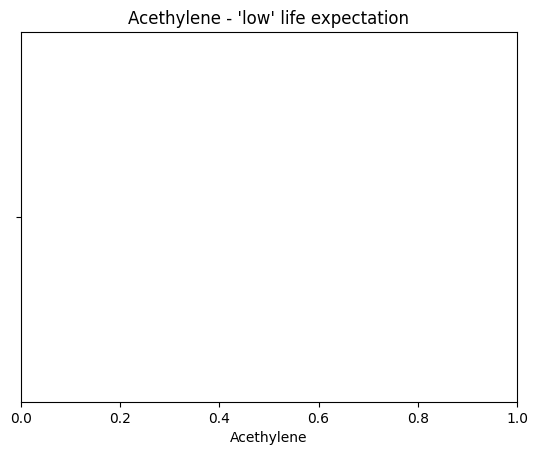

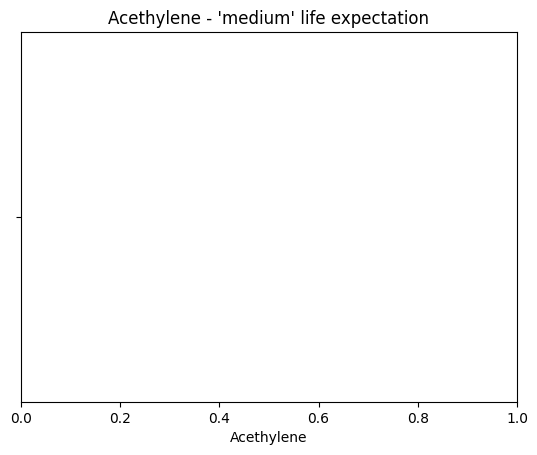

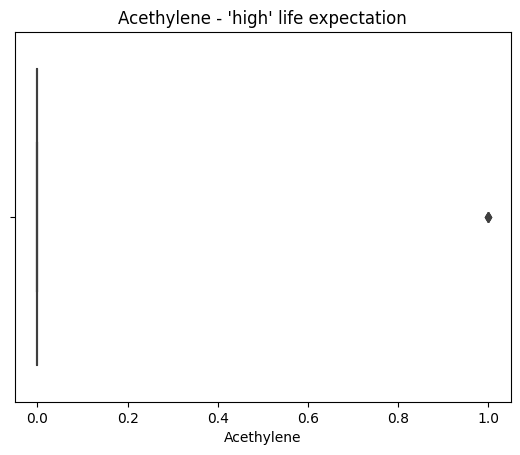

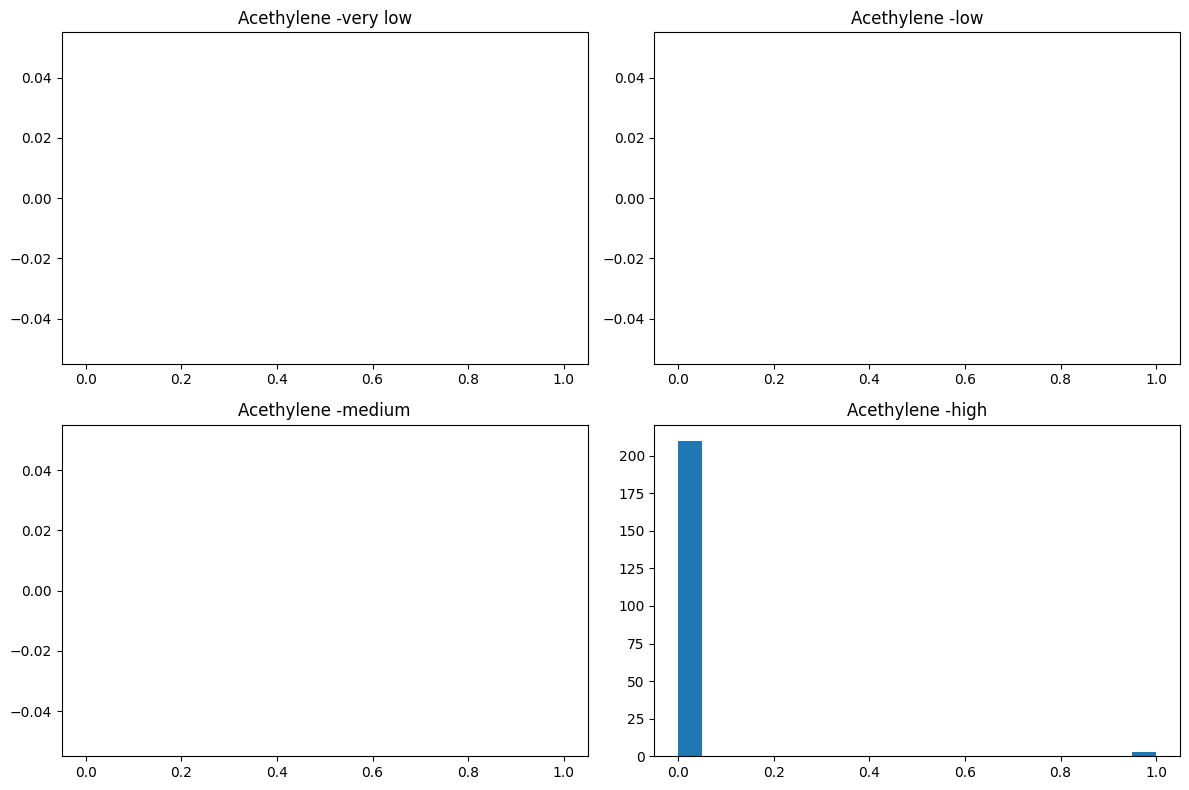

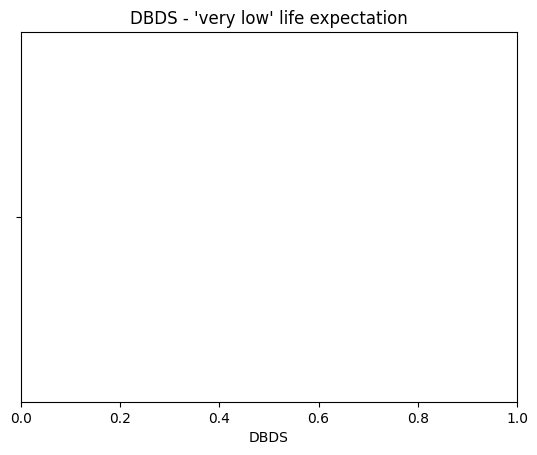

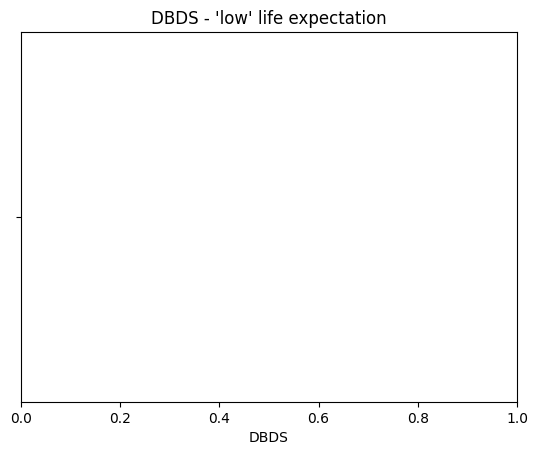

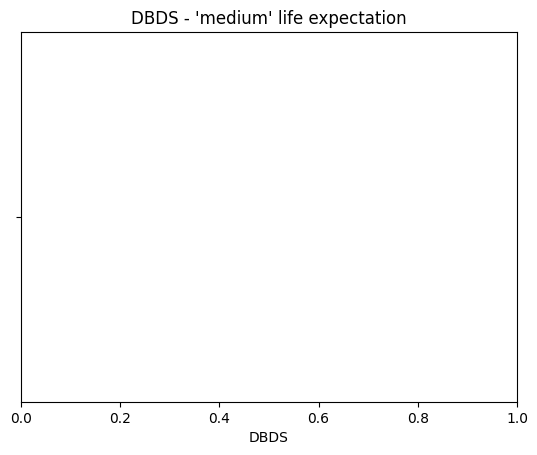

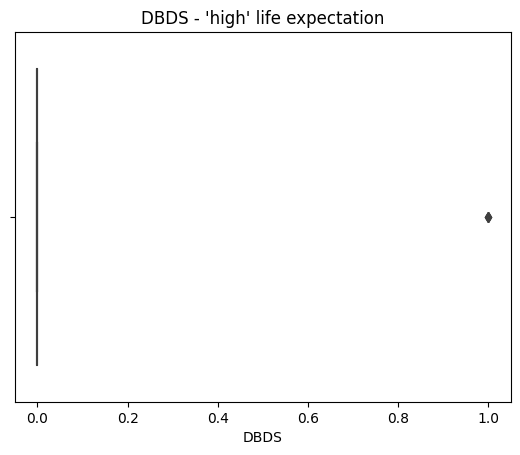

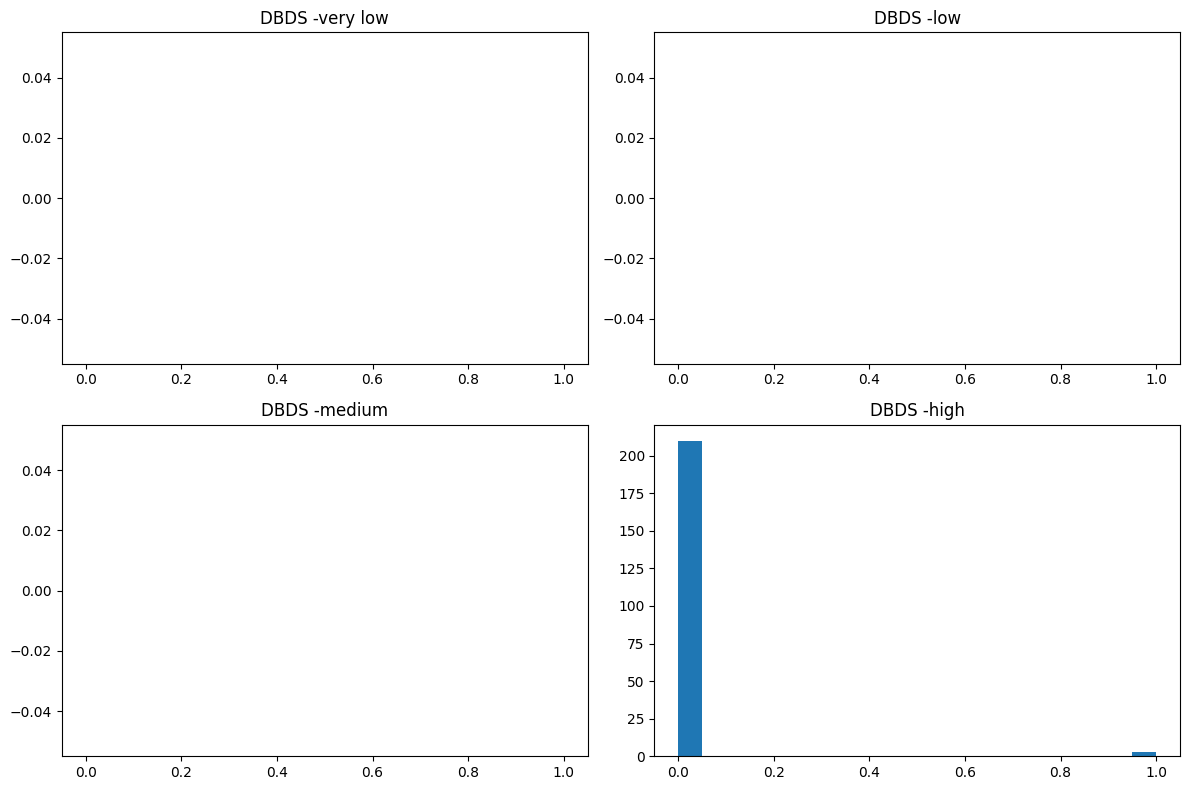

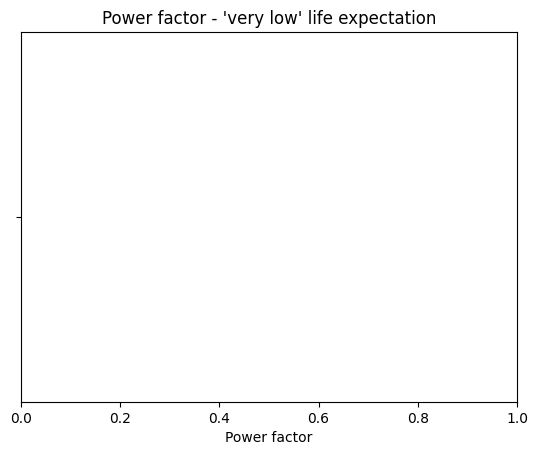

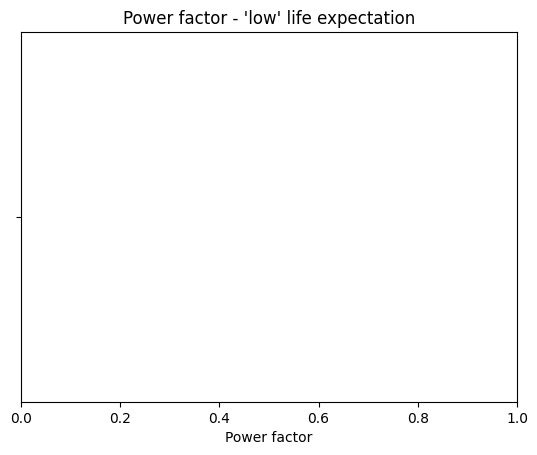

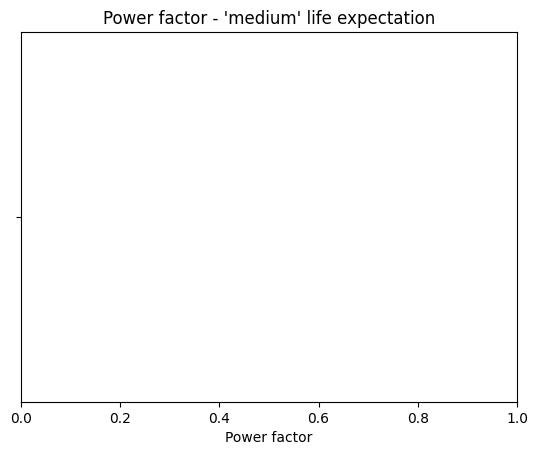

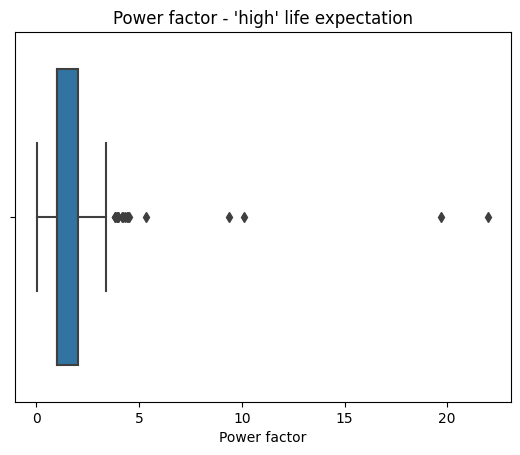

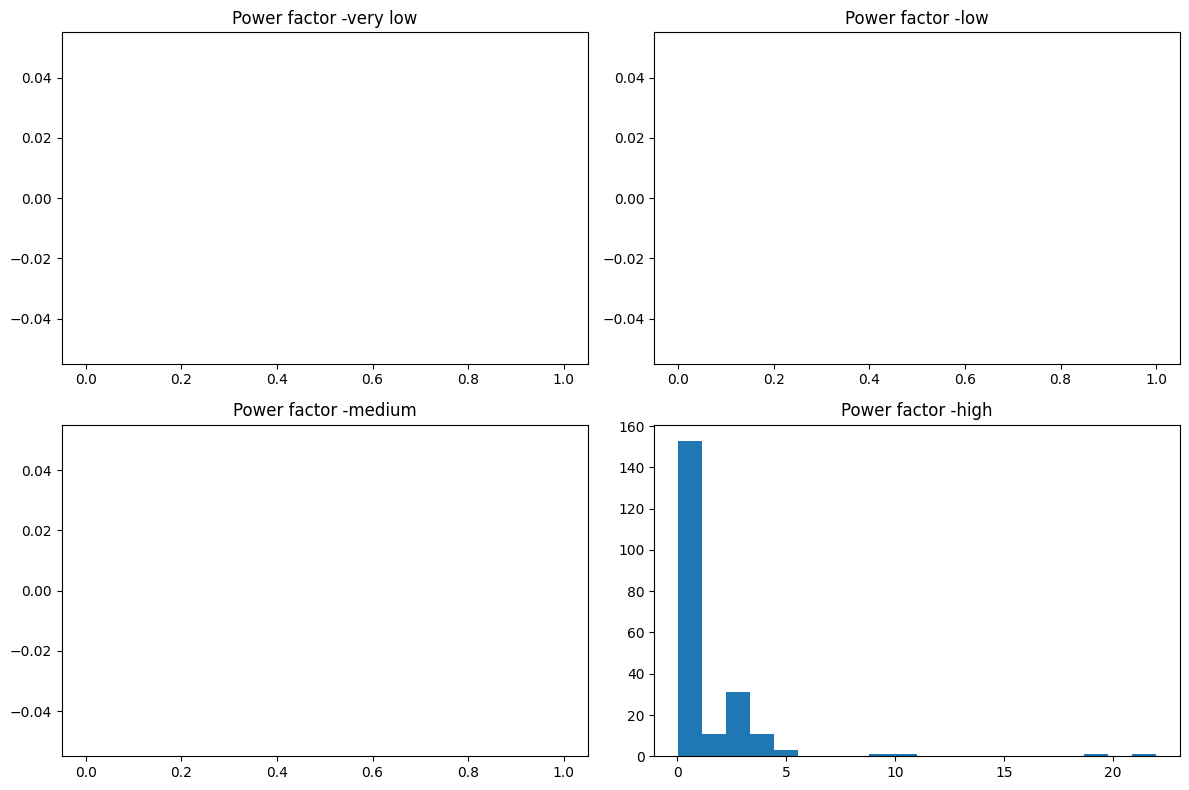

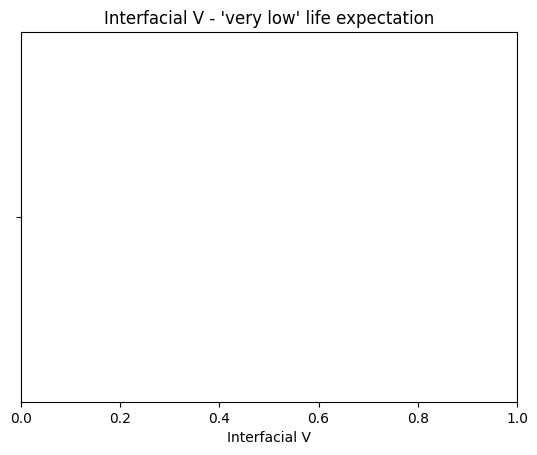

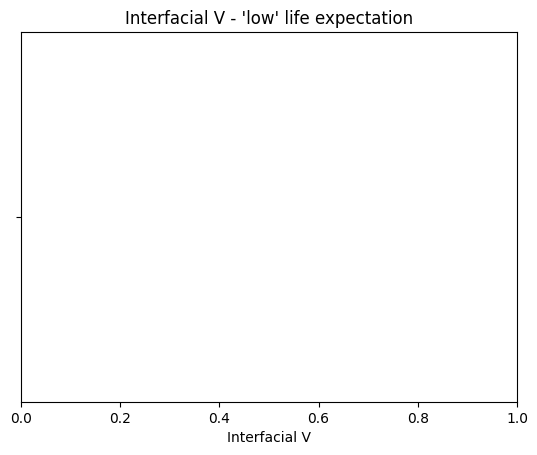

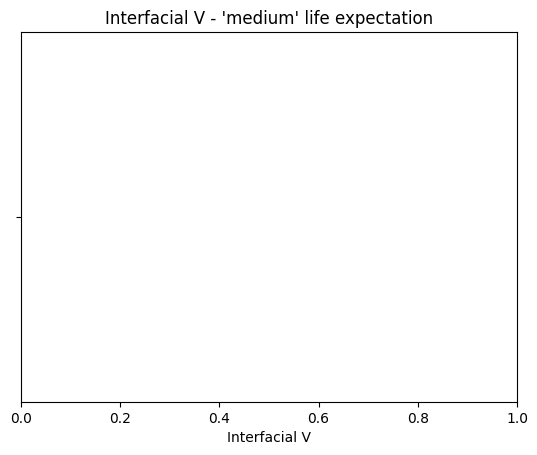

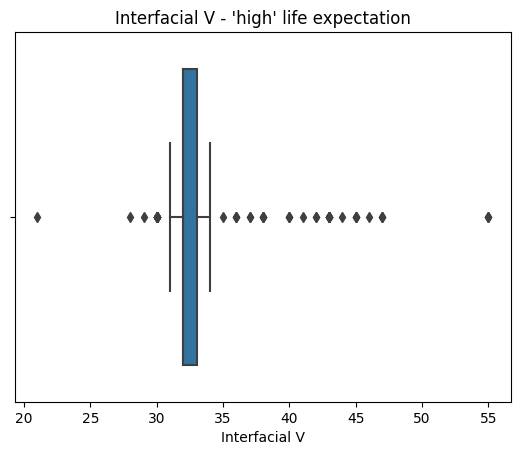

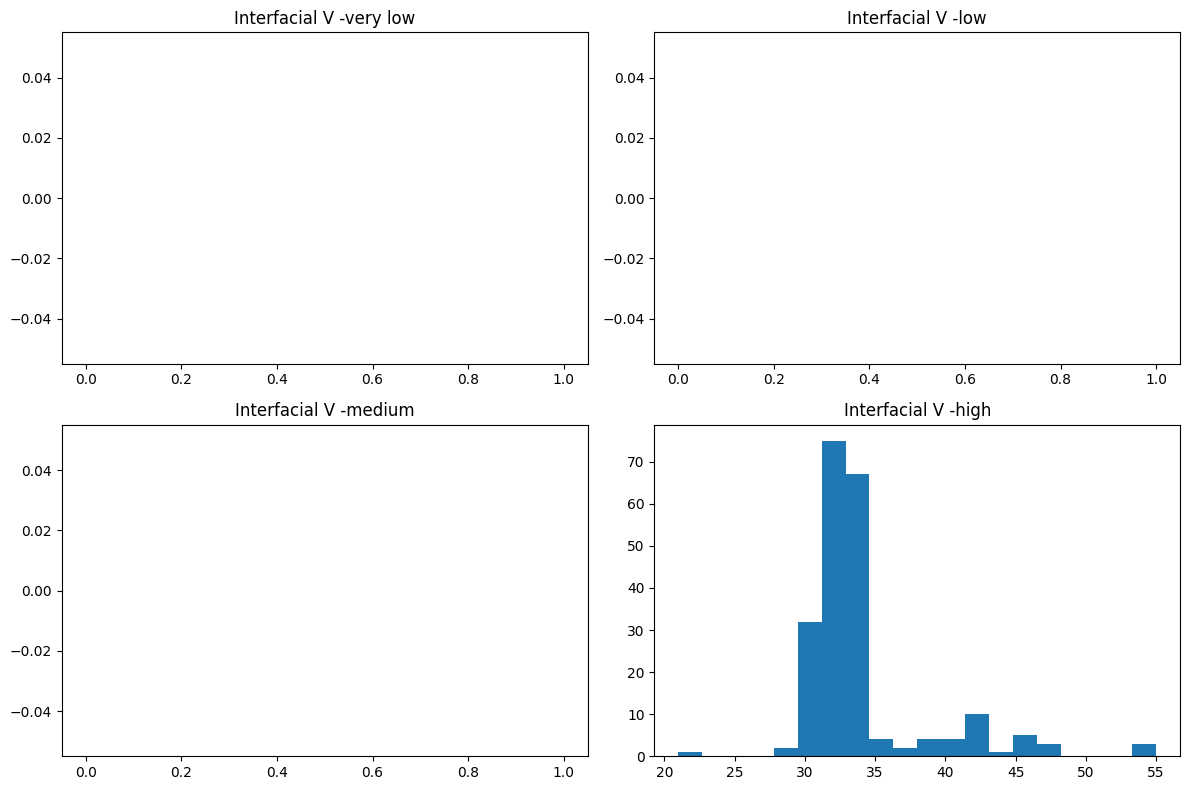

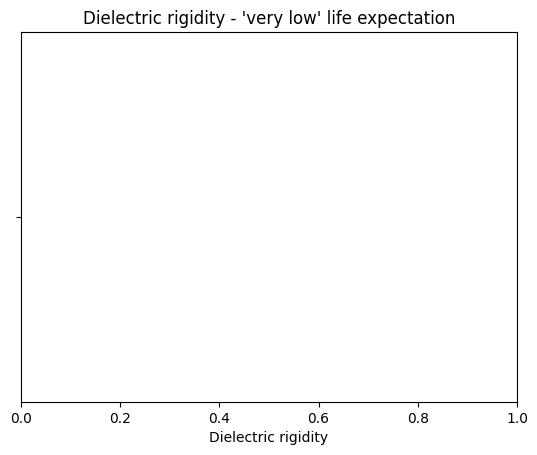

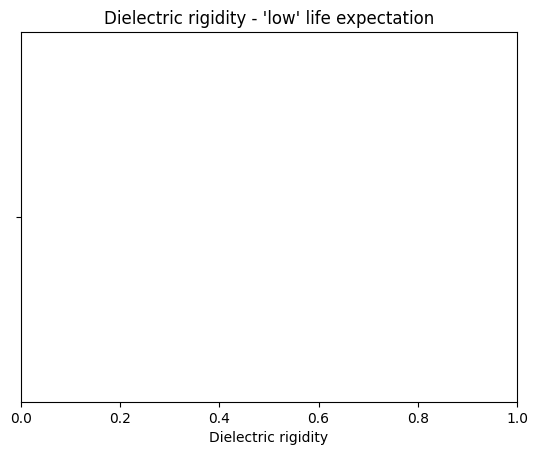

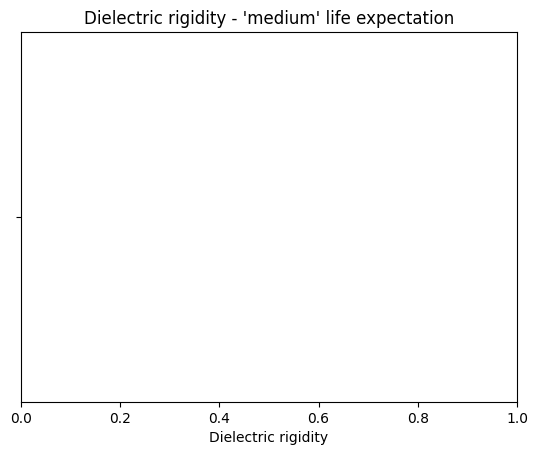

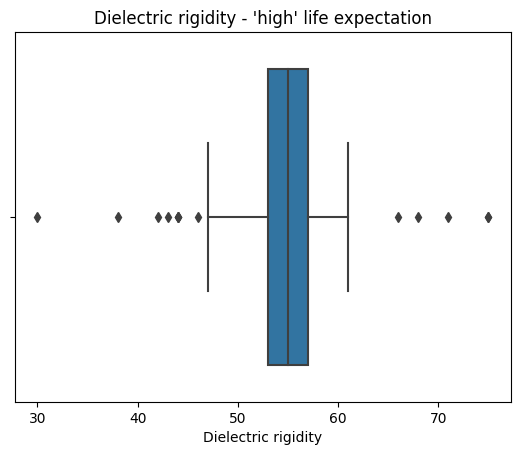

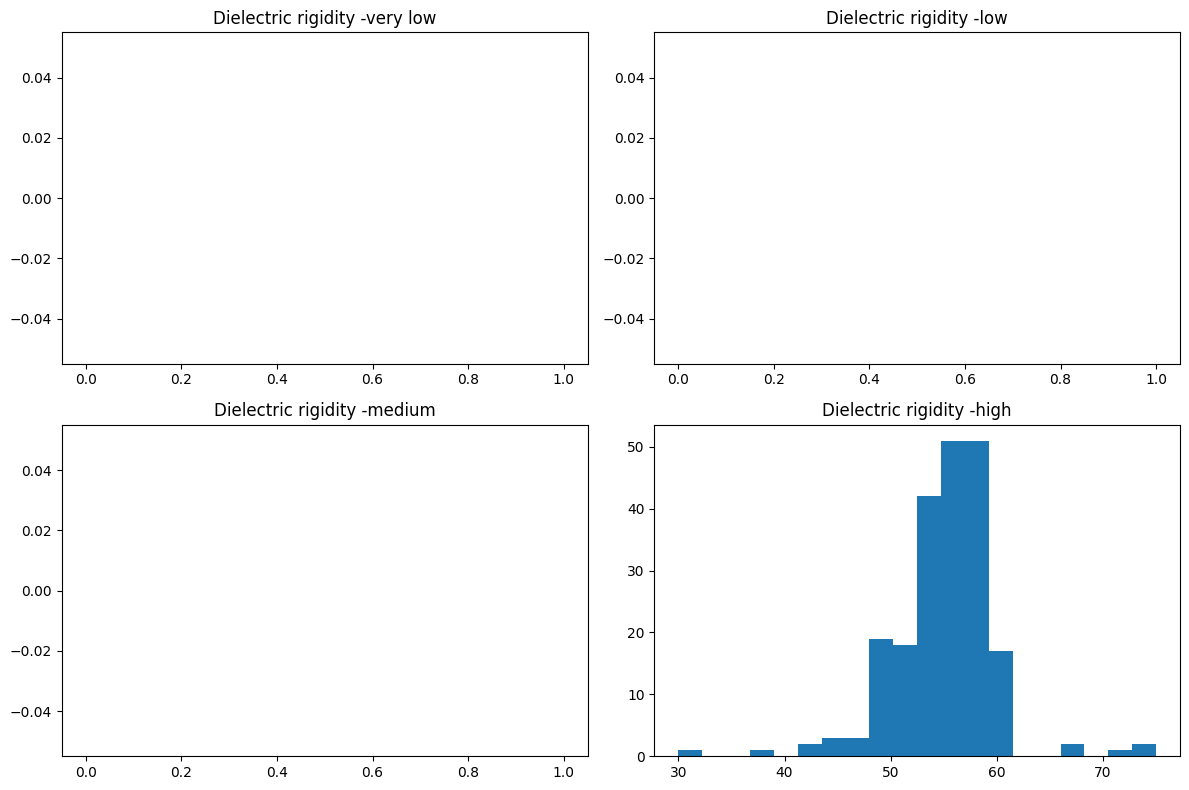

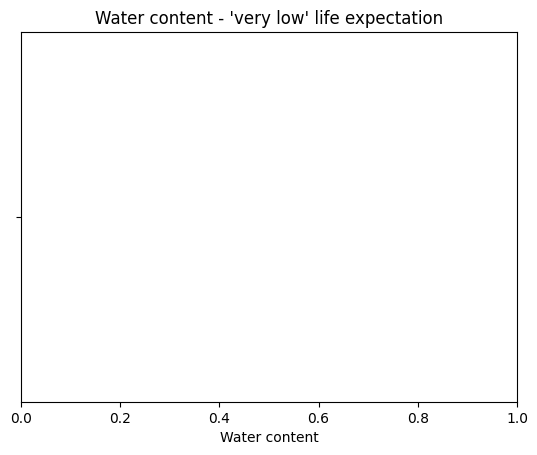

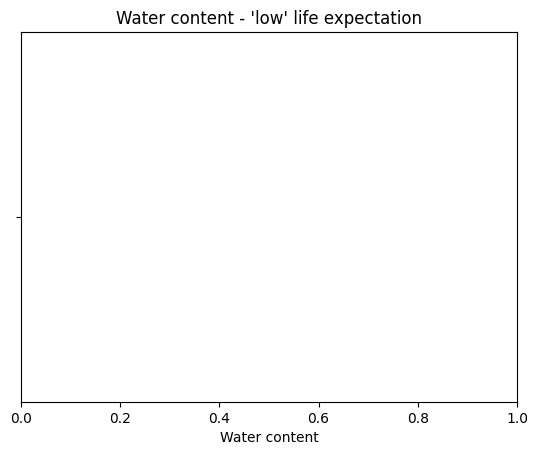

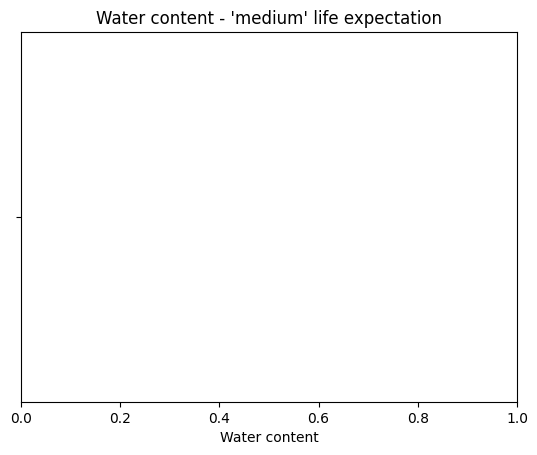

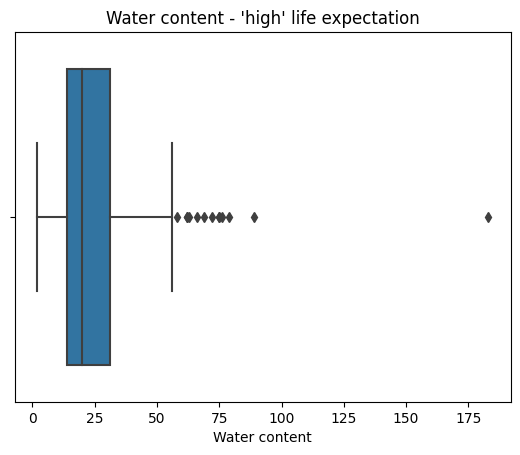

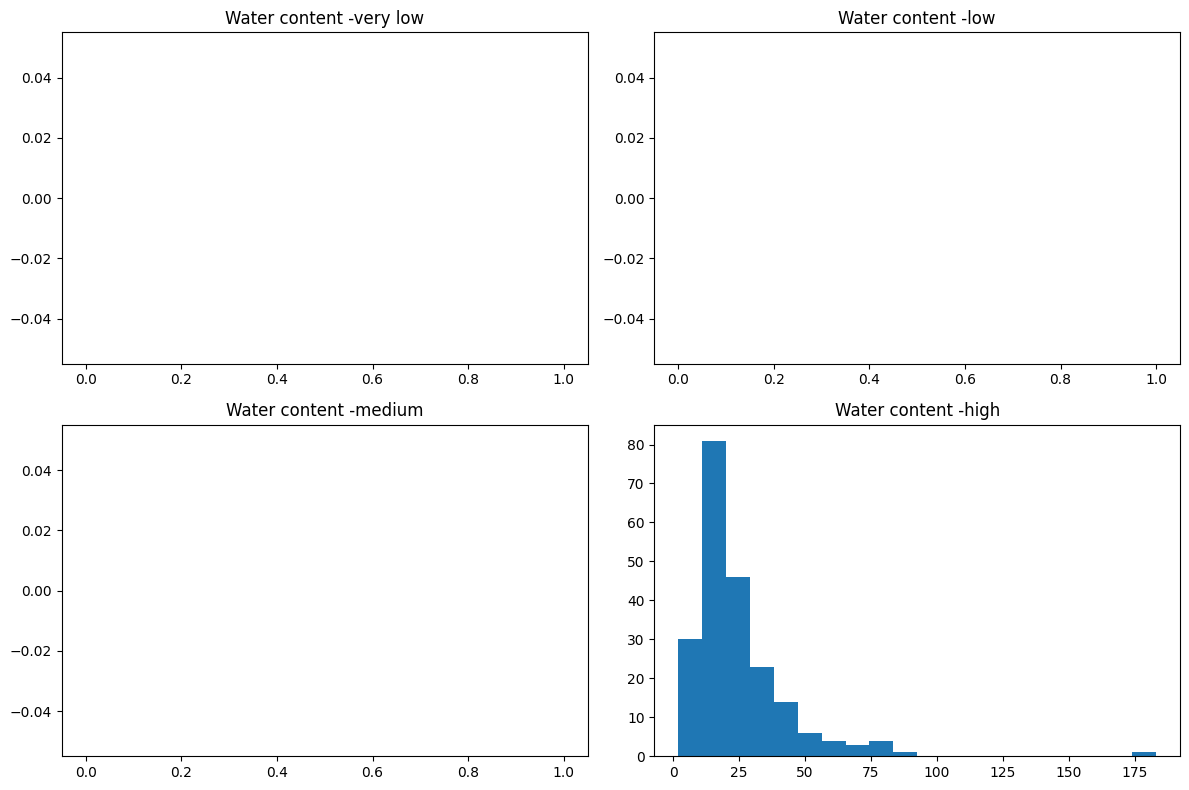

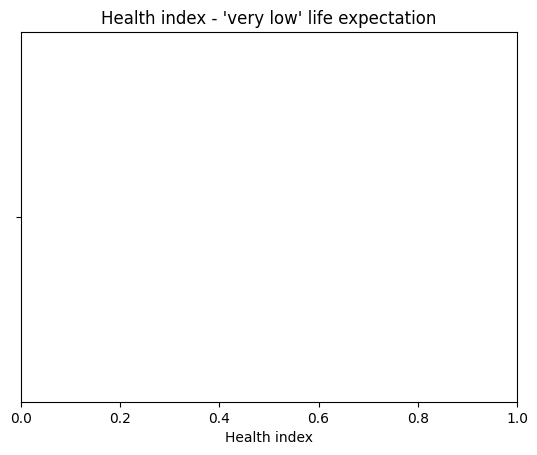

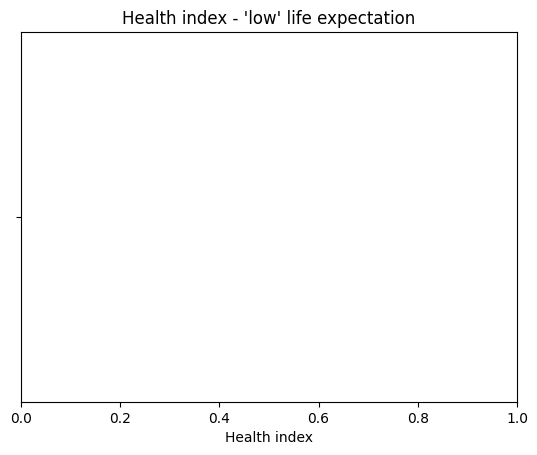

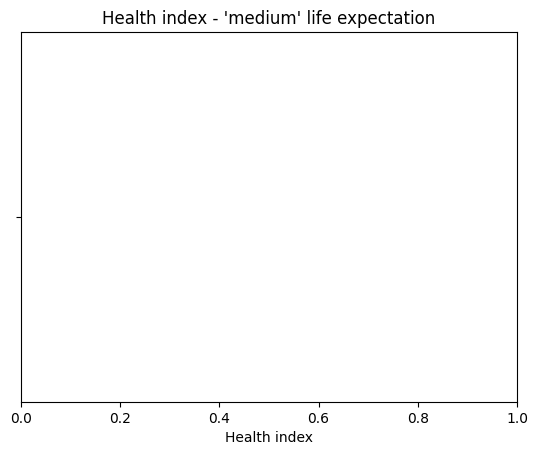

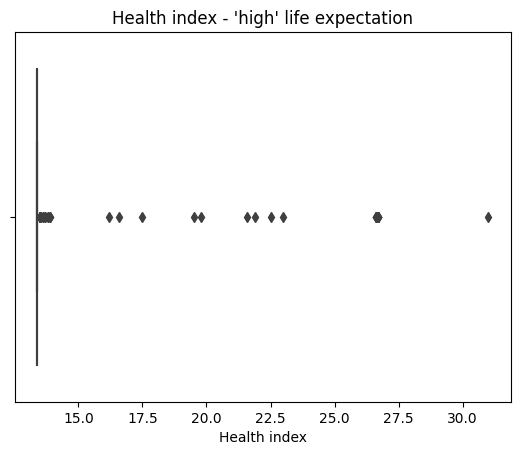

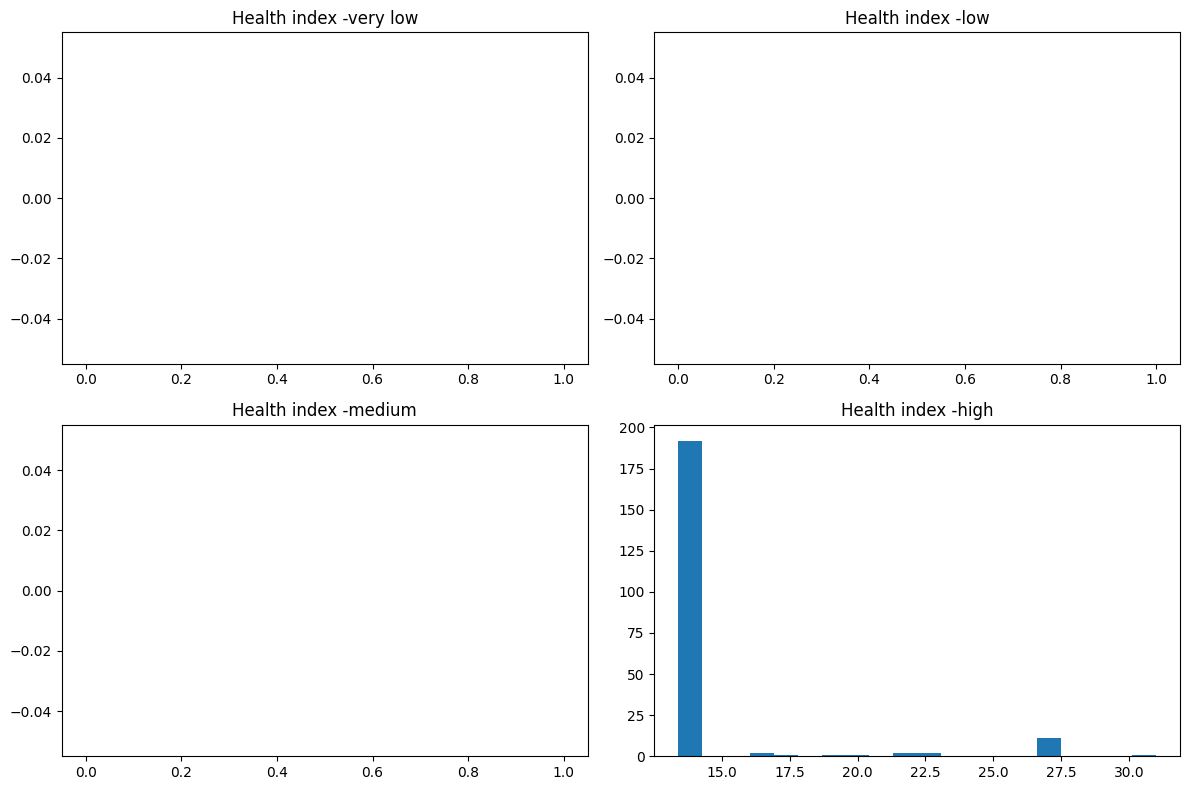

In [22]:
# Gera o box plot e o histograma de cada feature para cada classe
colunas = new_df.columns.tolist() # Converte em lista
for feature in colunas:
    if feature not in ["Life expectation", "class"]:
        box_plot_histogram(df, feature) # função criada

In [23]:
outliers_values = {"Hydrogen": 15000, "Oxigen": 40000, "Nitrogen": 80000,
                   "Methane": 2000, "CO": 1000, "CO2": 15000, "Ethylene": 7500,
                   "Acethylene": 3000, "Power factor": 30, "Water content": 100}

In [24]:
index_outliers, all_outliers =get_outliers(new_df, outliers_values) # Cria lista com outliers para cada feature

In [25]:
# Ver todos os outliers
outliers = new_df.iloc[all_outliers]
print(outliers.groupby(['class']).size())

# verificando outlier da feature "oxigen"
outliers = new_df.iloc[index_outliers["Oxigen"]]

media = ceil(new_df["Oxigen"].mean()) # Arredonda o valor da média
new_df.loc[index_outliers["Oxigen"][2], "Oxigen"] = media # Substitui pela média

new_df.loc[index_outliers["Oxigen"][1], "Oxigen"] = 30000 # Substitui..

new_df = new_df.drop(395, axis = 0) # Remoção do outlier

class
 10 < lf < 20    10
 20 < lf < 40     9
40 < lf < 60      3
lf < 10           2
dtype: int64


In [26]:
# Acessa o valor na coluna "Oxigen" para o índice específico
valor_outlier_oxigen = new_df.iloc[index_outliers["Oxigen"][1]]["Oxigen"]

# Print do valor
print("Valor do outlier para Oxigen:", valor_outlier_oxigen)


Valor do outlier para Oxigen: 30000


In [27]:
# Obter os índices onde 'Oxigen' é maior que 15000
indices_outliers_oxigen = new_df[new_df['Oxigen'] > 15000].index

# Visualizar os índices
print("Índices dos outliers para Oxigen maiores que 15000:")
print(indices_outliers_oxigen)





Índices dos outliers para Oxigen maiores que 15000:
Int64Index([  2,   7,  10,  11,  20,  29,  37,  44,  45,  46,
            ...
            433, 434, 436, 437, 438, 439, 440, 441, 443, 448],
           dtype='int64', length=114)


In [28]:
# Obter os índices onde 'Oxigen' é maior que 15000
indices_outliers_oxigen = new_df[new_df['Oxigen'] > 15000].index

# Remover os outliers de 'Oxigen'
new_df = new_df.drop(indices_outliers_oxigen, axis=0)

# Agora, se desejar remover um outlier específico (exemplo: índice 395)
#new_df = new_df.drop(395, axis=0)


In [29]:
# Obter os índices onde 'Oxigen' é maior que 15000
indices_outliers_oxigen = new_df[new_df['Oxigen'] > 15000].index

# Visualizar os índices
print("Índices dos outliers para Oxigen maiores que 15000:")
print(indices_outliers_oxigen)

Índices dos outliers para Oxigen maiores que 15000:
Int64Index([], dtype='int64')


In [30]:
new_df['Oxigen'].describe()

count      355.000000
mean      3558.901408
std       4130.467291
min         57.000000
25%        382.500000
50%       1690.000000
75%       5735.000000
max      15000.000000
Name: Oxigen, dtype: float64

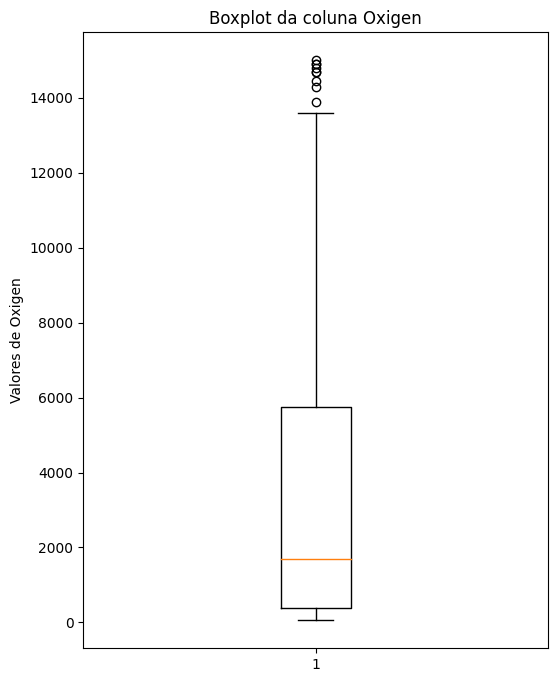

In [31]:
# Plotar o boxplot para a coluna 'Oxigen'
plt.figure(figsize=(6, 8))
plt.boxplot(new_df['Oxigen'])
plt.title('Boxplot da coluna Oxigen')
plt.ylabel('Valores de Oxigen')
plt.show()

##2) Com base no que foi feito com os outros outliers da feature 'oxigen', remover os outliers das demais features. Para cada outlier, dependendo do contexto, escolha a forma como substitui-los.

In [32]:
# Para a feature "health index" na classe "40 < lf < 60"
print(df['high'].groupby(['Health index']).size())



Health index
13.4    176
13.5      8
13.6      2
13.7      2
13.8      2
13.9      2
16.2      1
16.6      1
17.5      1
19.5      1
19.8      1
21.6      1
21.9      1
22.5      1
23.0      1
26.6      4
26.7      7
31.0      1
dtype: int64


In [33]:
index = df['high'].index[df['high']['Health index'] == 13.4].tolist()
print(len(index))

176


In [34]:
classe_high = df['high']


In [35]:
indices_13_4 = [i for i, val in enumerate(classe_high['Health index']) if val == 13.4]

In [36]:
for idx in indices_13_4:
    novo_valor = round(random.uniform(30, 80), 1)
    classe_high['Health index'][idx] = novo_valor

<ipython-input-36-c9f417c4a5ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classe_high['Health index'][idx] = novo_valor
<ipython-input-36-c9f417c4a5ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classe_high['Health index'][idx] = novo_valor
<ipython-input-36-c9f417c4a5ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classe_high['Health index'][idx] = novo_valor
<ipython-input-36-c9f417c4a5ef>:3: SettingWithCopyWarning:

In [37]:
# Para a feature "health index" na classe "40 < lf < 60"
print(df['high'].groupby(['Health index']).size())

Health index
13.4    176
13.5      8
13.6      2
13.7      2
13.8      2
13.9      1
31.4      1
32.2      1
33.4      1
36.7      1
37.5      1
41.7      1
43.0      1
43.4      1
44.4      1
44.5      1
46.2      1
47.6      1
48.3      1
49.4      1
50.8      1
55.2      1
67.0      1
72.8      1
72.9      1
74.7      1
76.1      1
78.8      1
dtype: int64


##(3) Conforme visto na etapa da visualização dos dados, para a classe    '40 < lf < 60', não há nenhum caso em que o 'Health index' do trafo é superior a 31, o que pode levar o classificador a pensar que  trafos com baixo 'Health index' possuem alta expectativa de vida, o que não é verdade. Por isso, para os casos em que 'Health index' é igual a 13.4 (maior ocorrência), alterar os valores dessa feature para valores aleatórios entre 30 e 80, com uma casa decimal. Dica: utilize a função random.uniform(min, max), pertencente à biblioteca random, para gerar os novos valores de forma aleatória e a função round(valor, numero_de_casas_decimais) para que ele fique com apenas umacasa decimal.

In [39]:
# Após o tratamento dos dados, atualizar o dataframe
update_df(new_df)

<ipython-input-40-676dc22f8999>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = new_df.corr()


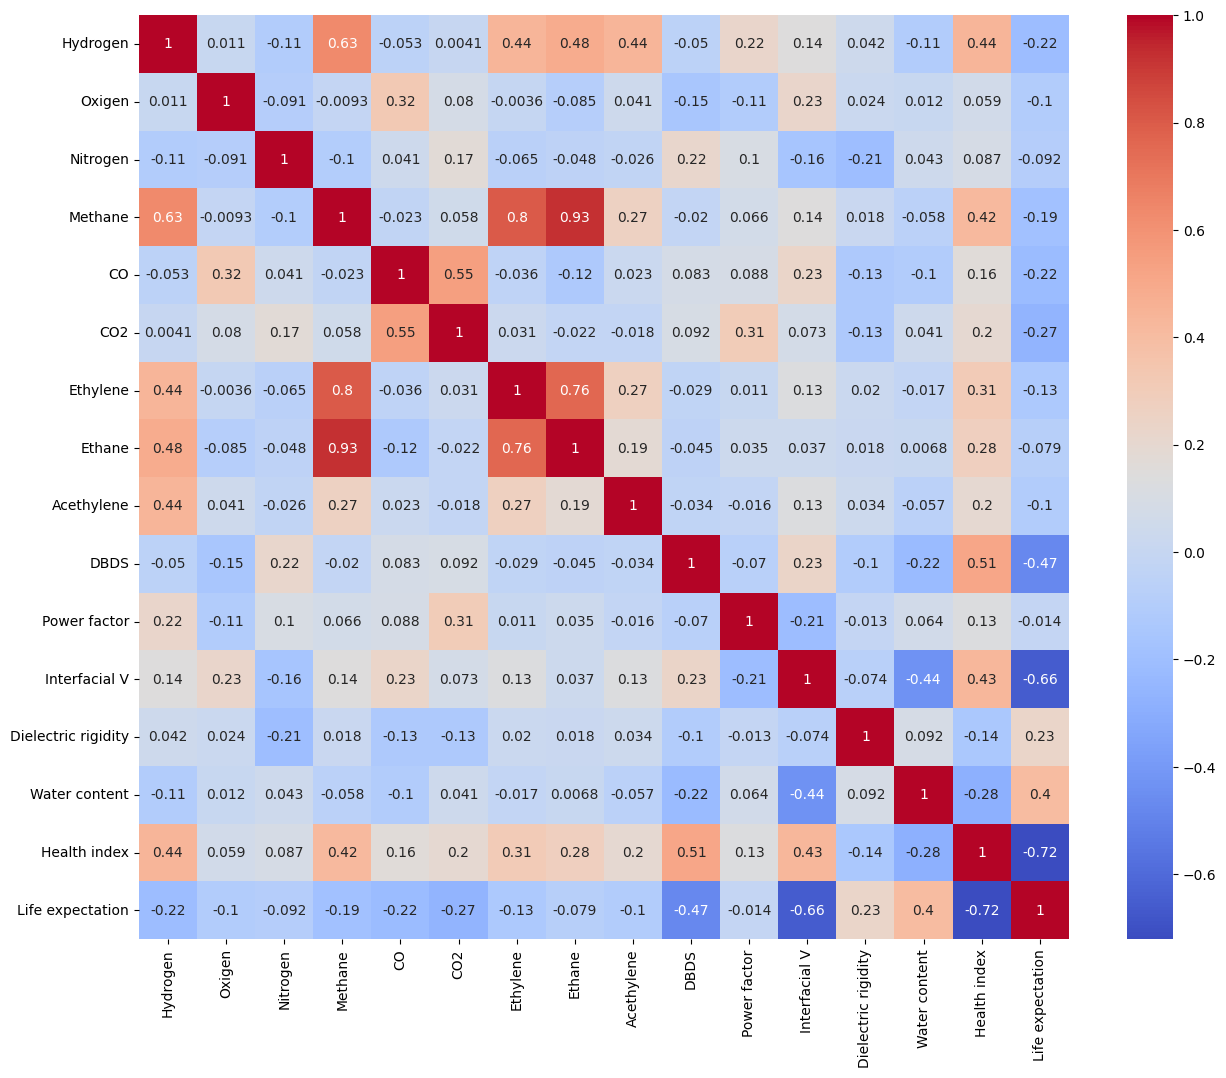

In [40]:
corrmat = new_df.corr()
plt.figure(figsize=(15,12))
srn.heatmap(new_df[corrmat.index].corr(), annot=True, cmap = 'coolwarm')
plt.savefig("correlation_map.png") #Salvar em imag png

##(4) O que pode ser pode ser concluido com base no mapa de correlação das features do dataframe em estudo?

<Figure size 3000x1800 with 0 Axes>

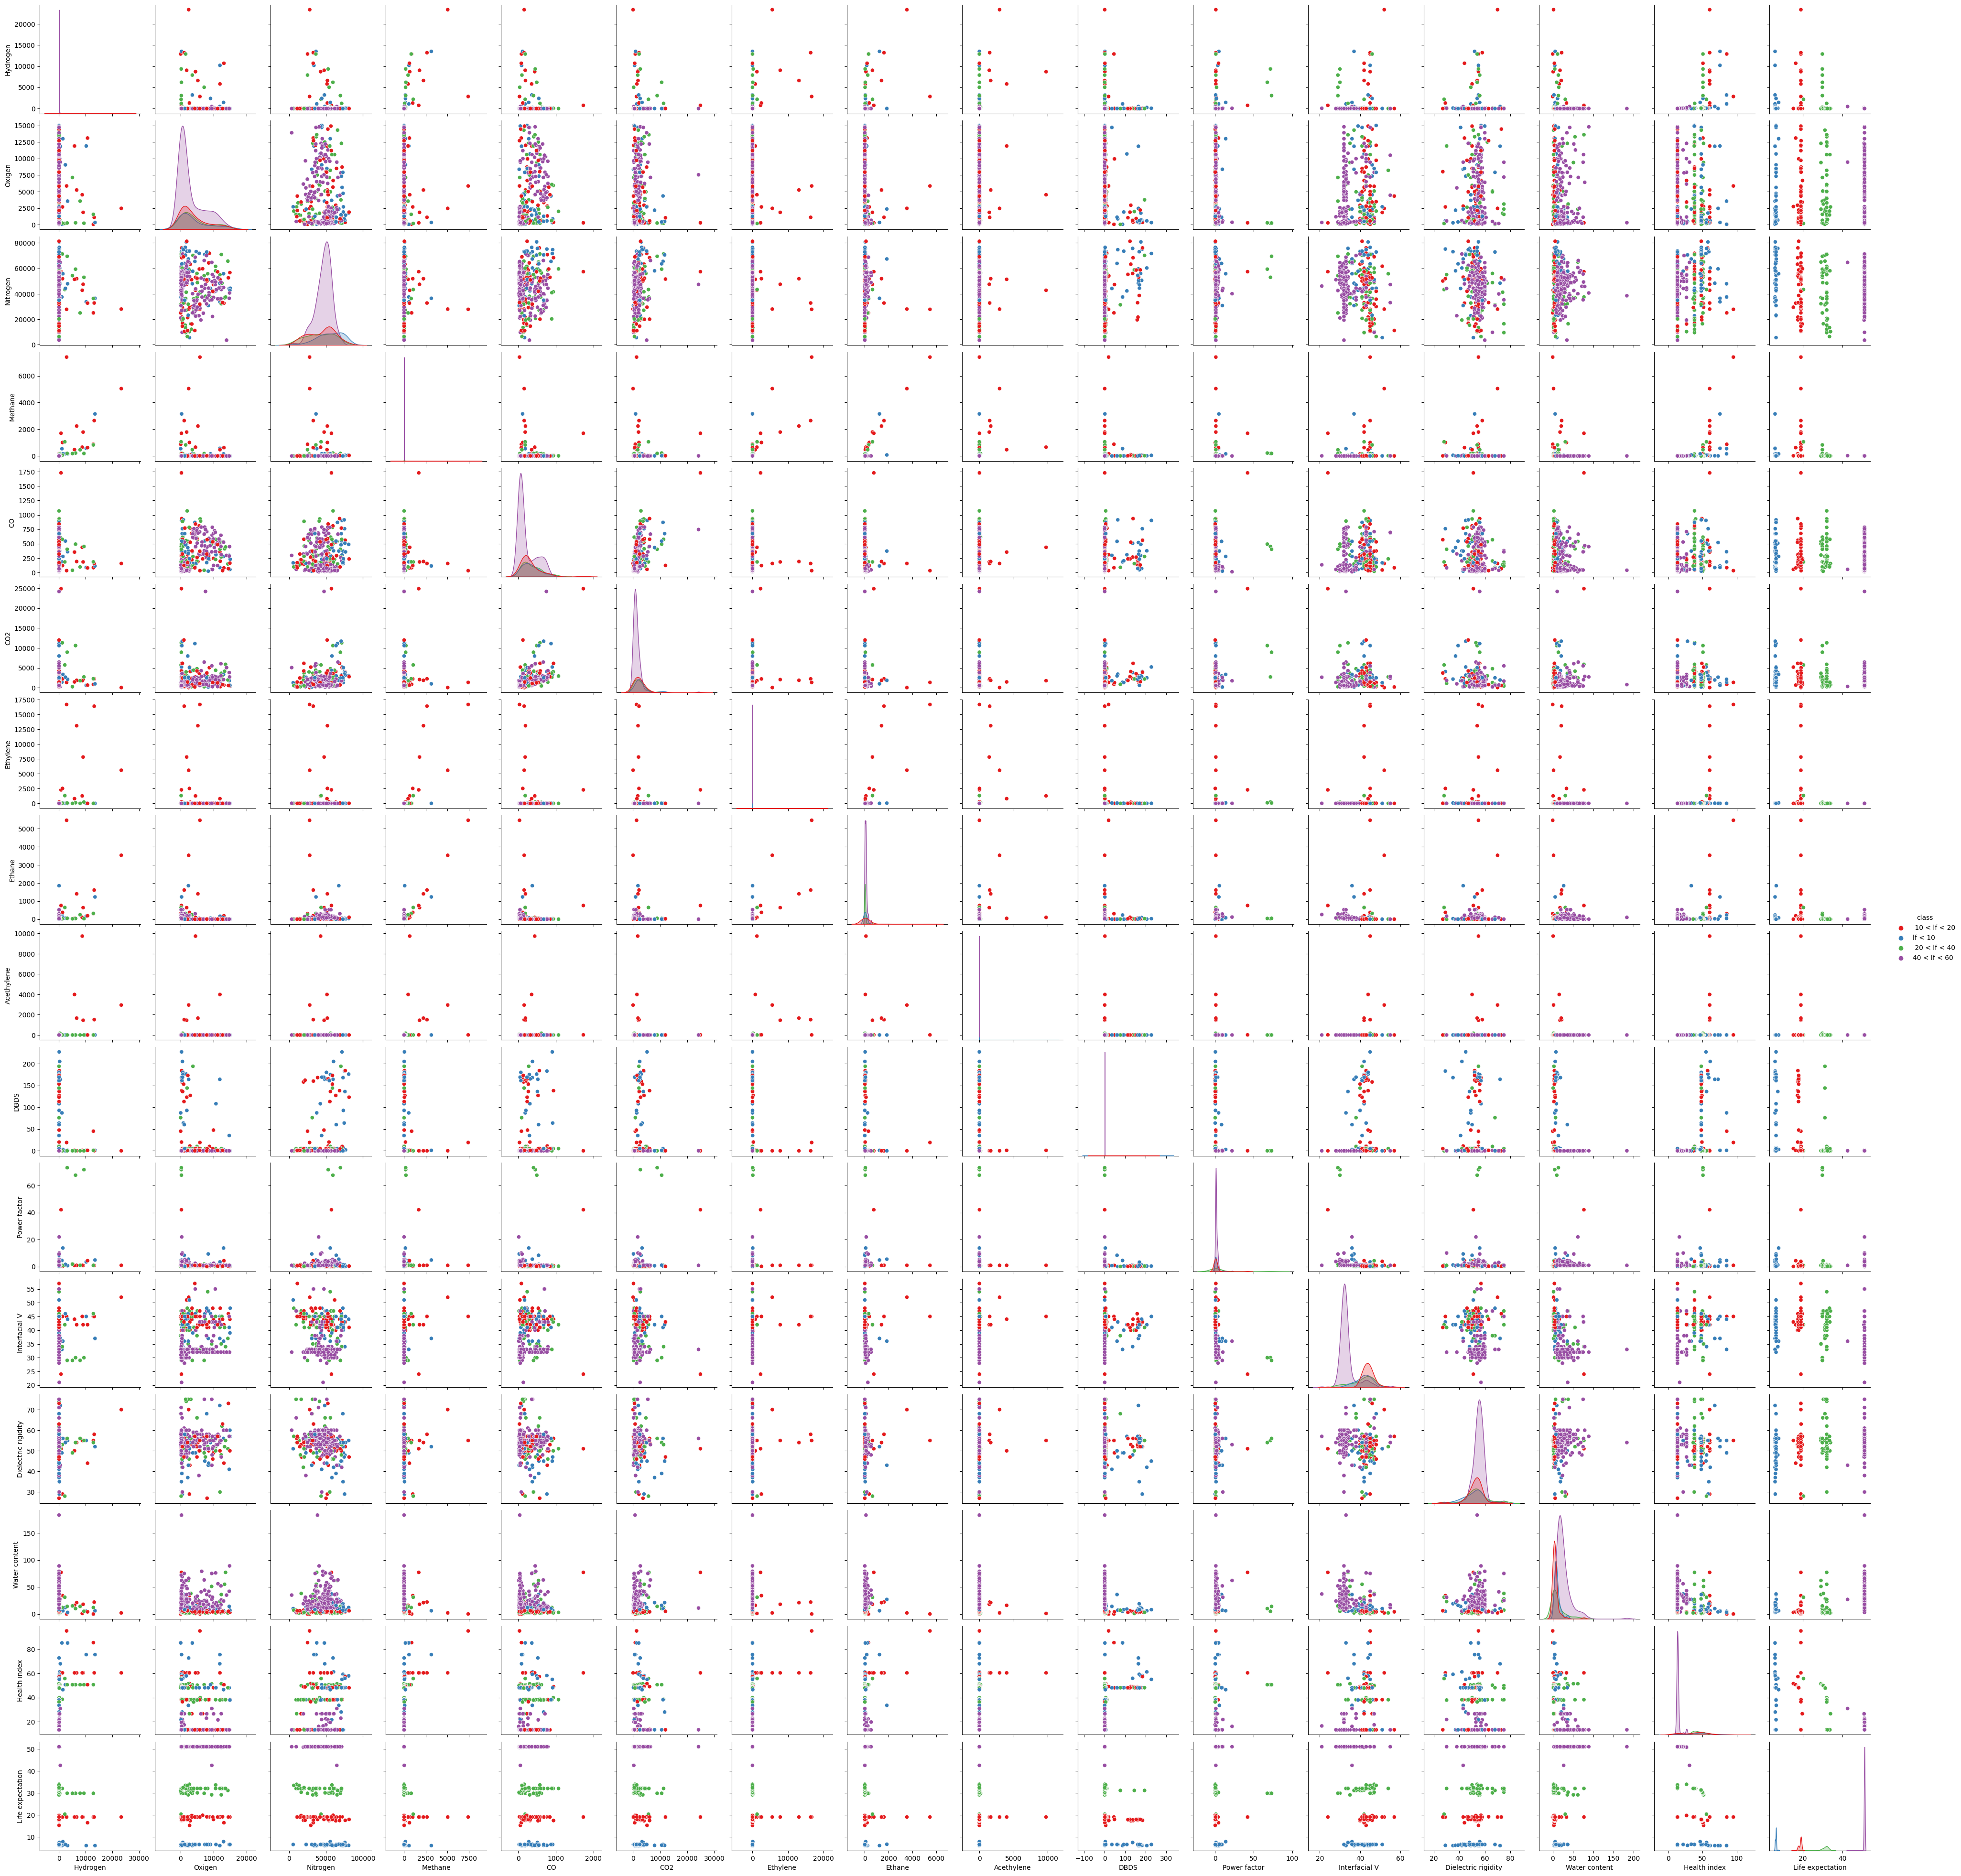

In [41]:
# Gráficos de dispersão
plt.figure(figsize=(30, 18))
srn.pairplot(new_df, hue = 'class', palette = 'Set1')
plt.savefig("pairplot.png")

##(5) Escolhers os gráficos de dispersão mais relevantes, imprimi-los em gráficos individuais e escrever sobre o que se pode concluir a respeito dos mesmos Dica: utilize a função srn.scatterplot(), da biblio seaborn;

# 6) Após as modificações, salvar o dataframe em formato .csv. Dica: utilize o comando nome_do_dataframe.to_csv("nome_do_arquivo.csv", index = False).    Sugestão: salvar as bases de dados antes e depois das alterações feitas na terceira questão.

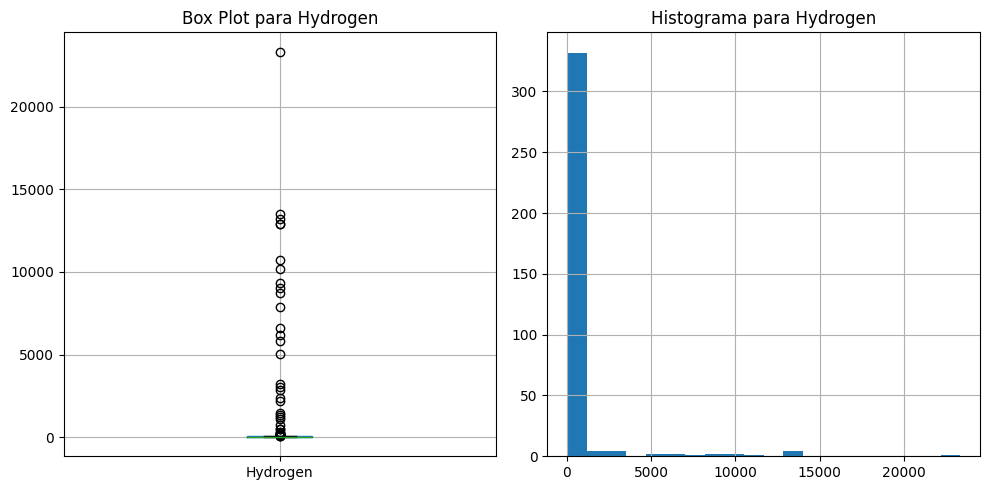

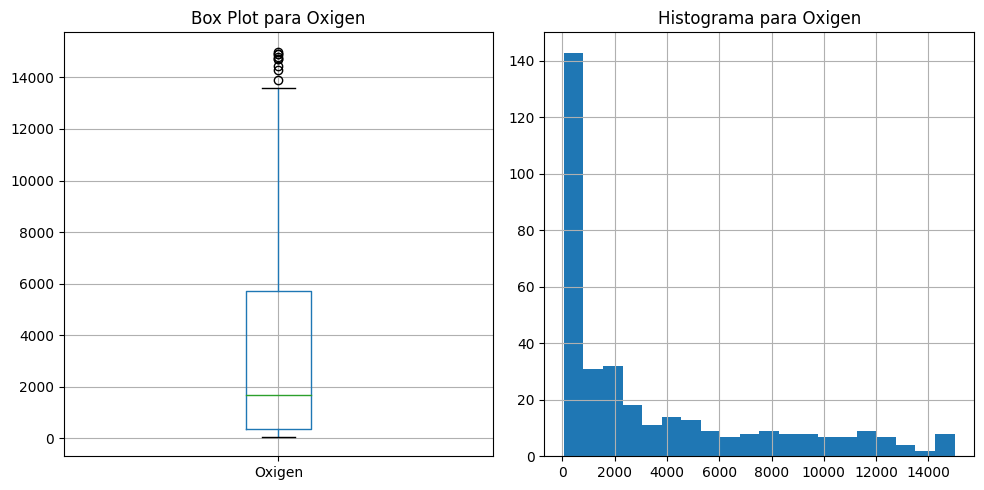

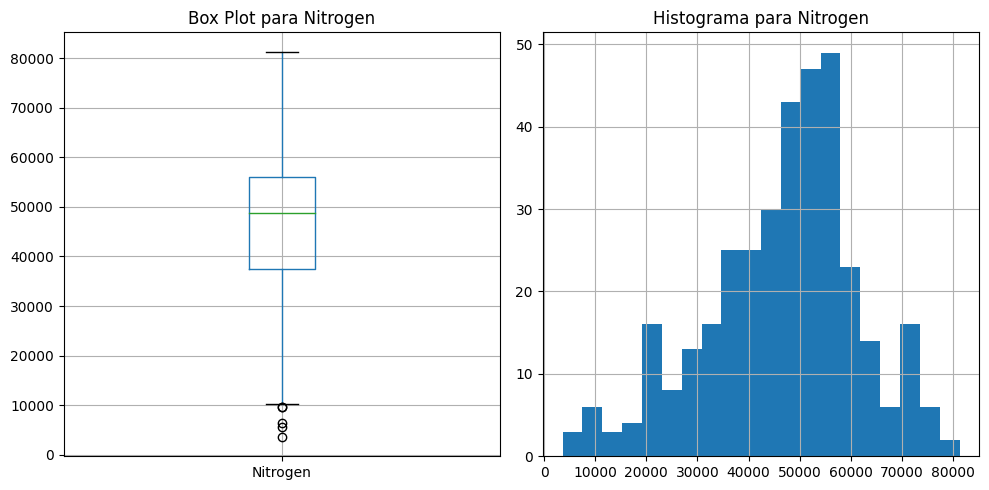

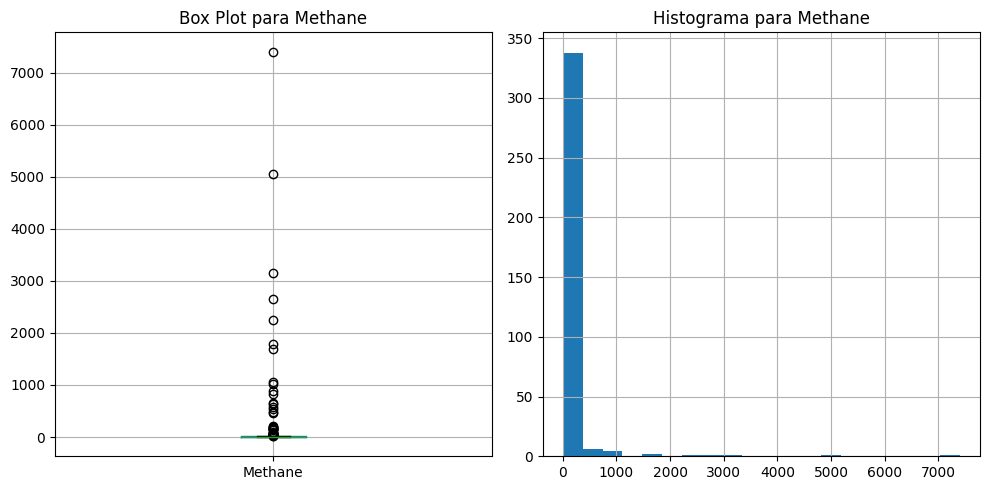

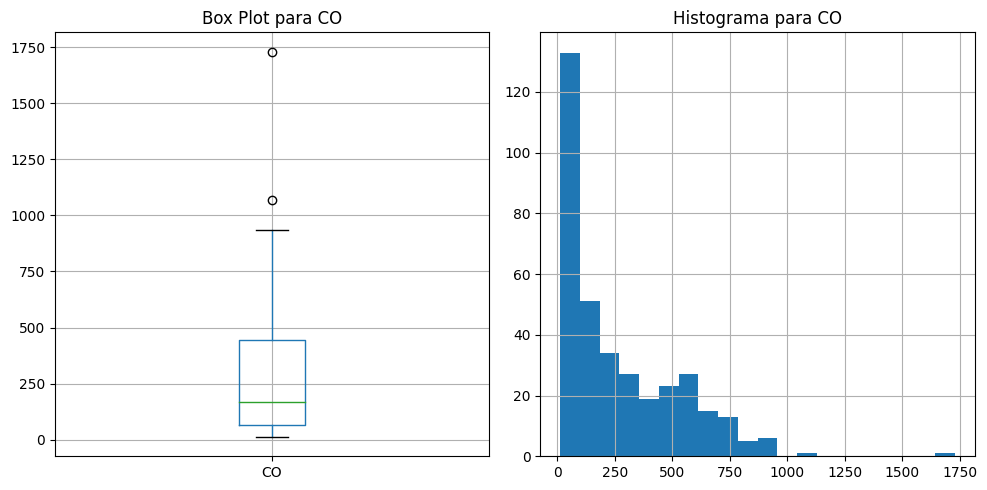

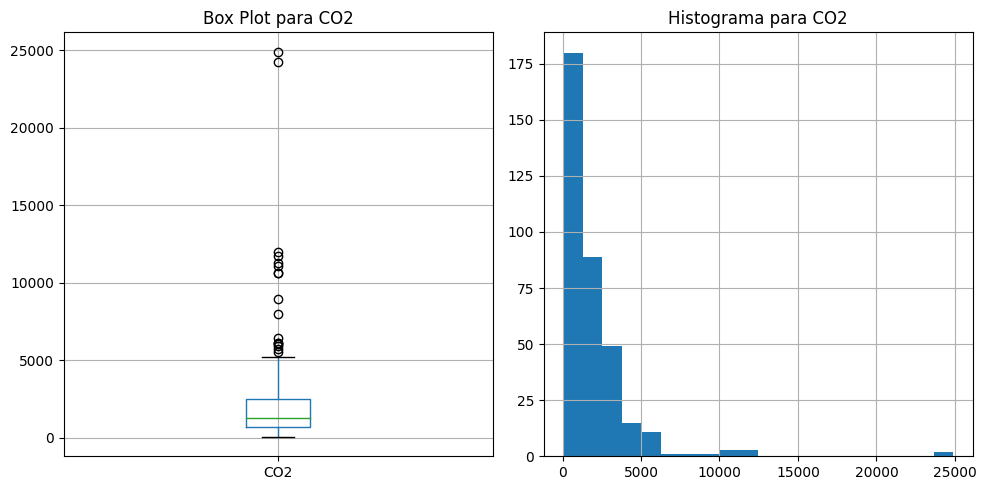

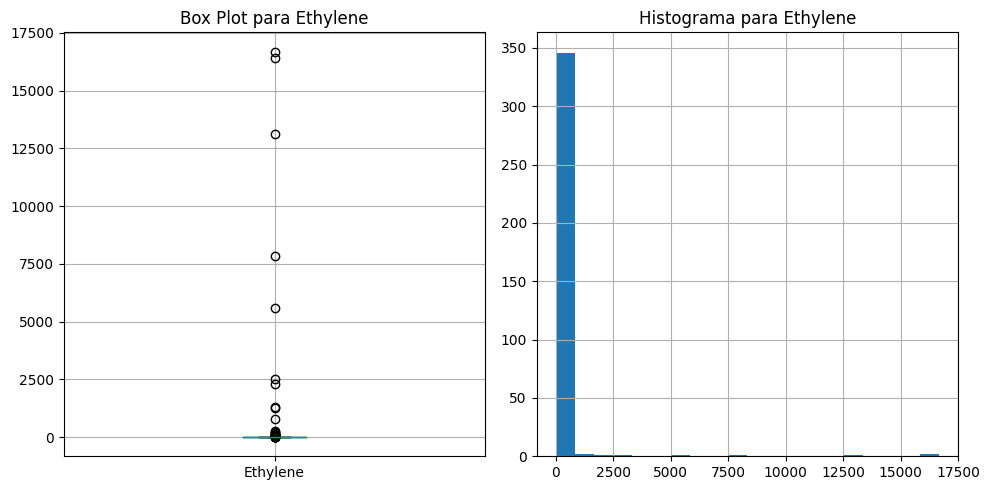

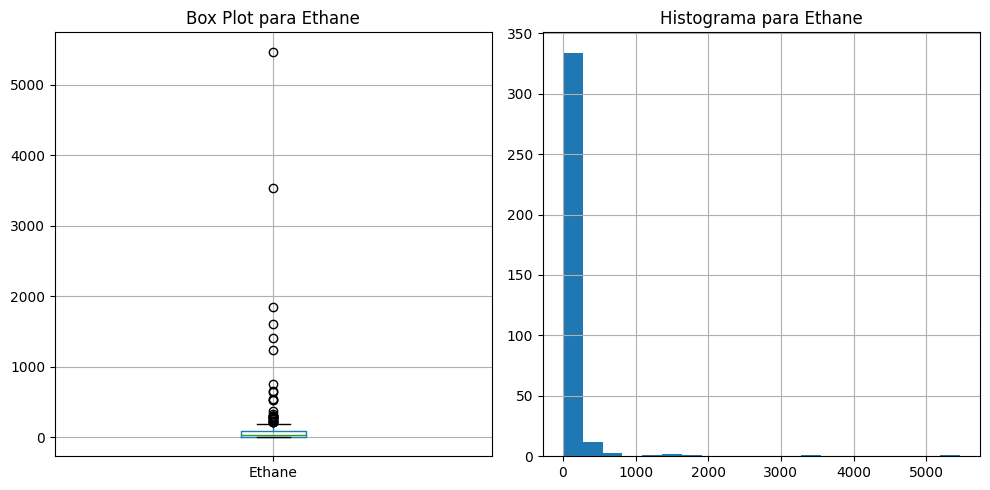

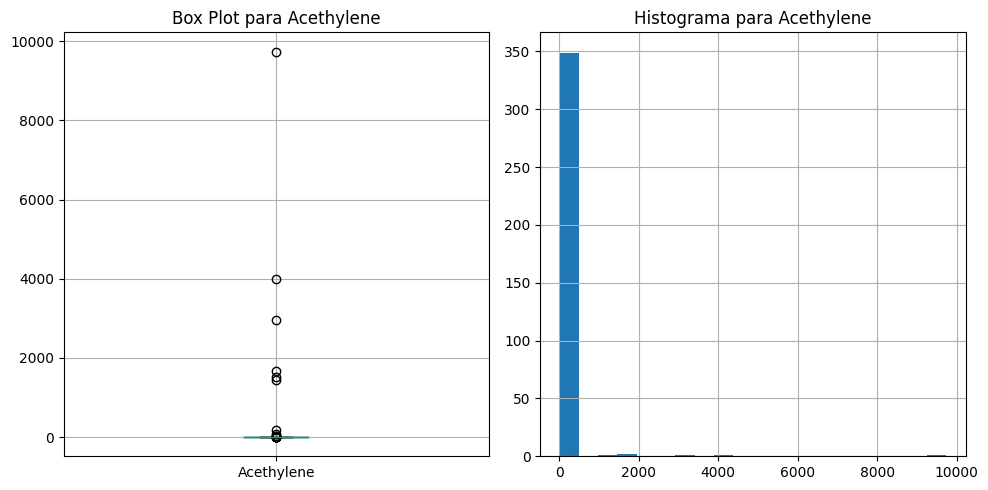

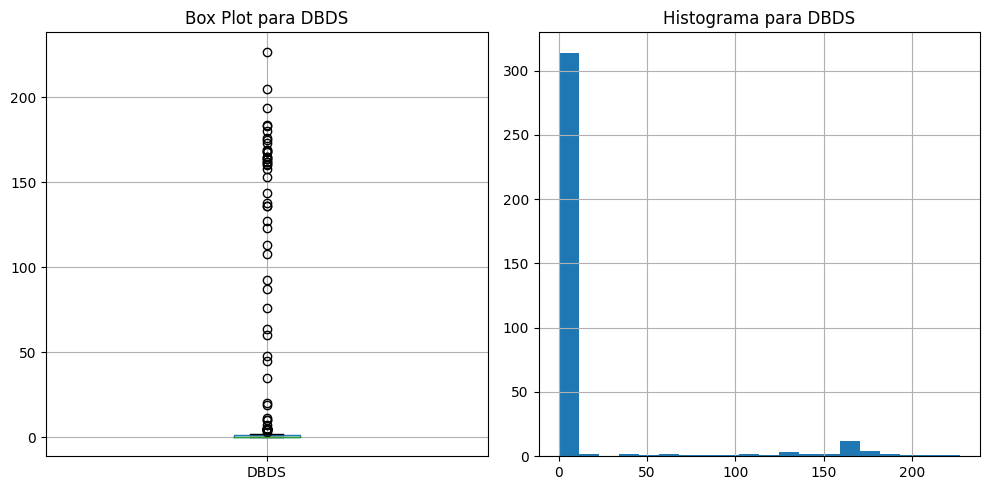

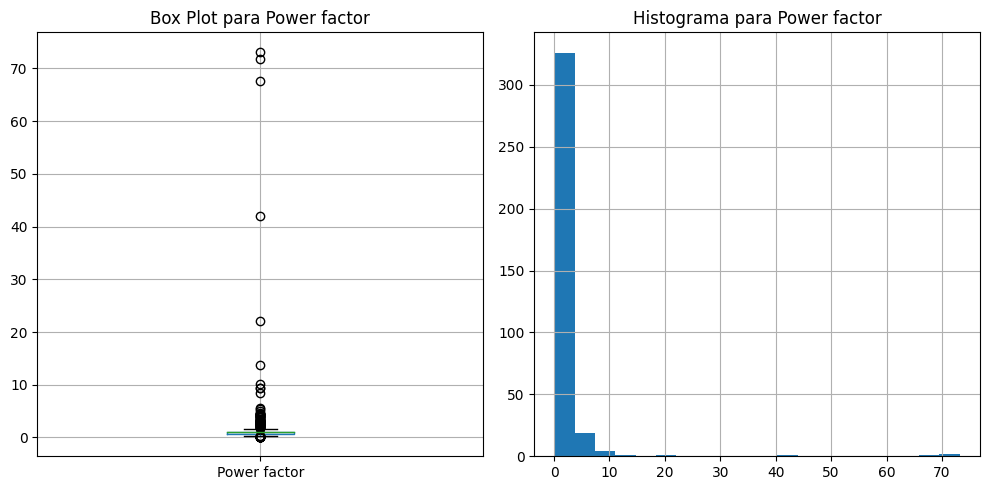

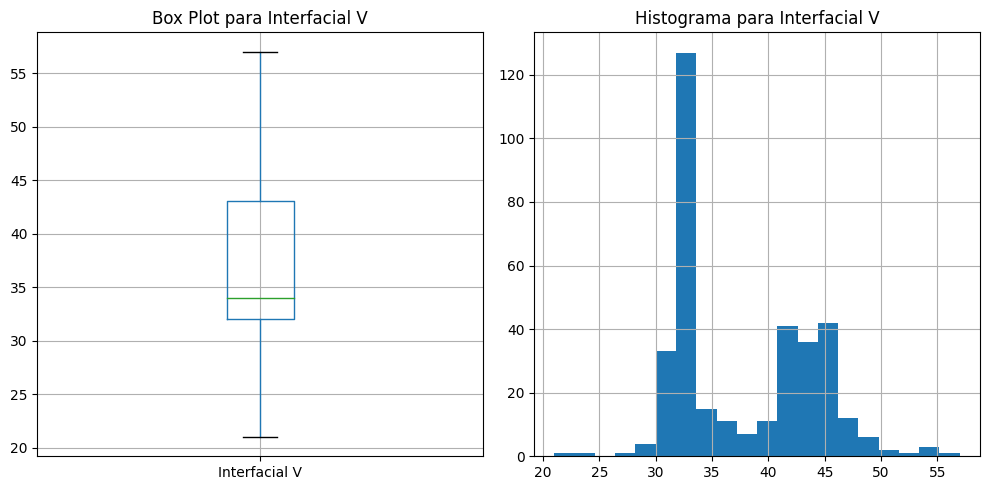

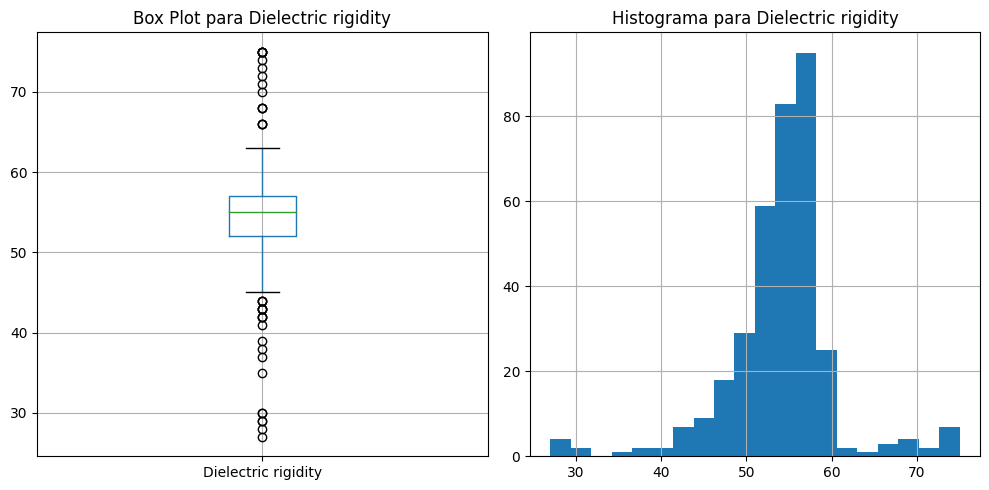

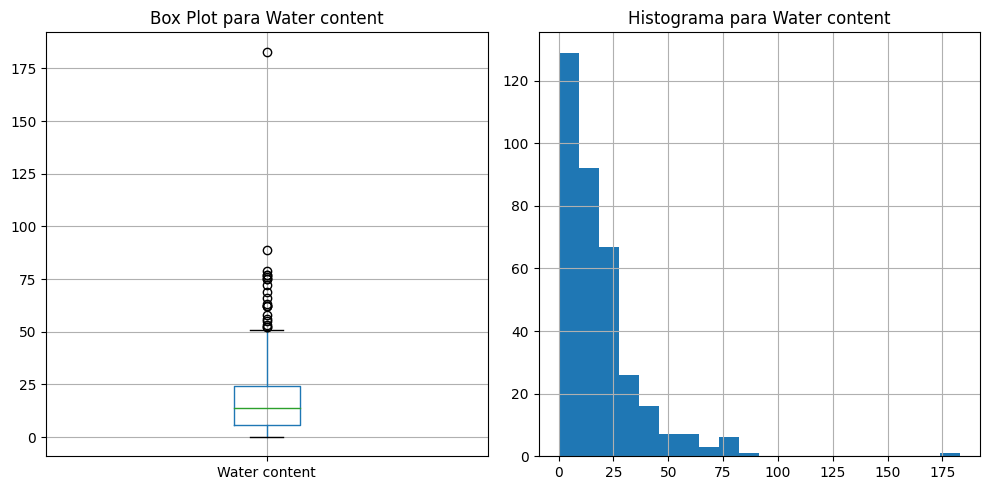

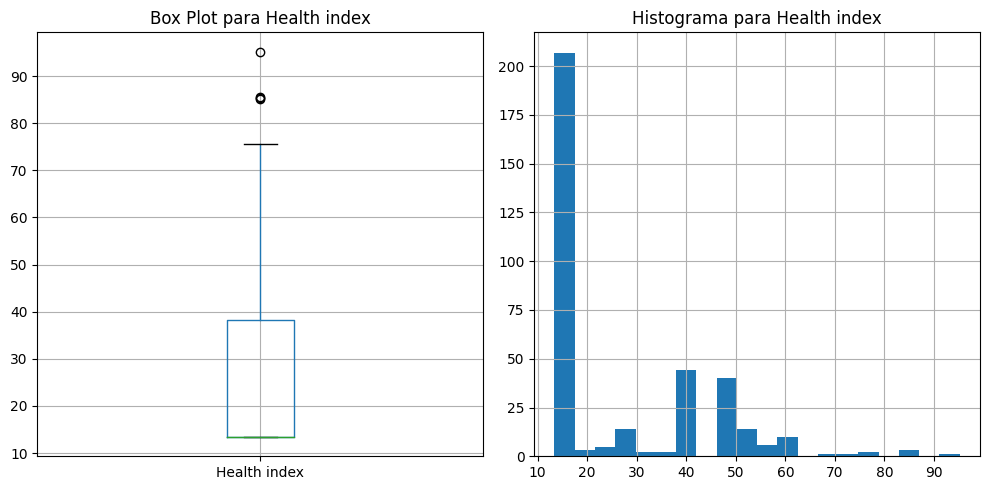

In [42]:
colunas = new_df.columns.tolist()
for feature in colunas:
    if feature not in ["Life expectation", "class"]:
        # Gera gráficos de caixa e histograma para cada coluna
        plt.figure(figsize=(10,5))

        # Box plot
        plt.subplot(1, 2, 1)
        new_df.boxplot(column=feature)
        plt.title(f'Box Plot para {feature}')

        # Histograma
        plt.subplot(1, 2, 2)
        new_df[feature].hist(bins=20)
        plt.title(f'Histograma para {feature}')

        plt.tight_layout()
        plt.show()